In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import scipy as sc
import scipy.stats
import h5py
from datetime import date
from datetime import datetime
from astropy.time import Time
from astropy.coordinates import SkyCoord,EarthLocation,AltAz,get_sun

import astropy.units as u
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'date.converter': 'concise'}
pylab.rcParams.update(params)
mpl.rcParams["figure.dpi"]= 300

In [2]:
home_path = os.getcwd()
path_to_plots = os.path.join(home_path,"plots")
hfile = h5py.File(os.path.join(home_path,"run_properties.h5"), "r")
props = list(hfile.keys())
prop_dict = {}
mask_time = np.array(hfile["t0"])>1e09 #Removes all values of t0=0 
for key in props:
    prop_dict[key] = np.array(hfile[key])
    prop_dict[key] = prop_dict[key][mask_time]
hfile.close()

def lin(x,m,t):
    return m*x+t

In [3]:
index_first_run = []
for i in range(len(prop_dict["nrun"])):
    if prop_dict["nrun"][i] not in prop_dict["nrun"][:i]:
        index_first_run.append(i)
print(prop_dict)
index_first_run = np.array(index_first_run)
mask_N = prop_dict["N_track"]>-1
t = Time(prop_dict["t0"], format = "unix")
t.format = "decimalyear"
obstime=t.copy()
t = t.value
TIN = prop_dict["time_in_night"]/3600
for i in range(len(TIN)):
    if TIN[i]>12:
        TIN[i] = TIN[i]-24

table = np.genfromtxt("Starlink_launches_from_source.CSV", 
                      delimiter = ";", skip_header = 2)
table = table.T
header =np.genfromtxt("Starlink_launches_from_source.CSV", delimiter = ";", 
                      skip_header = 1, max_rows = 1, dtype = "str")
COSPAR_ID = np.loadtxt("Starlink_launches_from_source.CSV", delimiter = ";",
                       dtype = "str", usecols = 0)
COSPAR_ID = [COSPAR_ID[i][np.char.find(COSPAR_ID[i], "("):] 
             for i in range(len(COSPAR_ID))]
COSPAR_ID = [COSPAR_ID[i][np.char.find(COSPAR_ID[i], ", 20")+2:-1] 
             for i in range(len(COSPAR_ID))]
launch_dates = np.loadtxt("Starlink_launch_dates.CSV", delimiter = ";",dtype = "str", 
                          usecols = 0, skiprows = 1)
launch_dates_all_sats = np.loadtxt("Launch dates.txt", dtype = "str",
                                   usecols = 0, skiprows = 1)
launch_dates_all_sats = [np.array(launch_dates_all_sats[i].split(".")).astype(int) 
                         for i in range(len(launch_dates_all_sats))]
launch_dates_all_sats = [datetime(launch_dates_all_sats[i][2], 
                                  launch_dates_all_sats[i][1], 
                                  launch_dates_all_sats[i][0]) 
                         for i in range(len(launch_dates_all_sats))]
dates_all_sats = Time(launch_dates_all_sats, format= "datetime")

format_date = "%d %B %Y, %H:%M"
format_date_sec = "%d %B %Y, %H:%M:%S"
dates = []
for i in range(len(launch_dates)):
    try:
        date = datetime.strptime(launch_dates[i] ,format_date)
        dates.append(date)
        continue
    except:
        pass
    try:
        date = datetime.strptime(launch_dates[i] ,format_date_sec)
    except:
        date = datetime(1900,1,1,0)
    dates.append(date)

dates = Time(dates, format = "datetime")
dates = dates.value

cumul_sum_launched = [np.nansum(table[1][:i+1]) for i in range(len(table[1]))]
cumul_sum_orbit = [np.nansum(table[5][:i+1]) for i in range(len(table[5]))]




launch_SL = open("Launch_dates_starlink.txt", "r").read().split("\n")
launch_OW = open("Launch_dates_OneWeb.txt", "r").read().split("\n")
launch_ES = open("Launch_dates_E-Space.txt", "r").read().split("\n")
format_launch = "%d.%m.%Y"
launch_all = launch_SL + launch_OW + launch_ES

launch_all = Time(np.sort([datetime.strptime(i, format_launch) for i in launch_all]),
                  format = "datetime")
mask_dates_all_sats = launch_all >np.sort(dates_all_sats.value)[-1]



TIN_bins = np.arange(int(np.min(TIN[mask_N]))-1, int(np.max(TIN[mask_N])+2))
zenith_bins = np.arange(0,61,5)
dur_bins = np.logspace(np.log10(np.min(prop_dict["duration"][mask_N])), np.log10(np.max(prop_dict["duration"])), 20 )
bright_bins = np.logspace(np.log10(900), np.log10(np.max(prop_dict["avg_brightness"])), 20 )
pix_bins = np.logspace(np.log10(np.min(prop_dict["unique_pix"][mask_N])),
                       np.log10(np.max(prop_dict["unique_pix"])), 20 )


mask_TIN = np.logical_or(TIN<-5.5, TIN>2.5)
mask_N_TIN = np.logical_or(TIN[mask_N]<-5.5, TIN[mask_N]>2.5)

figure_size = (6,3)


{'N_track': array([-1., -1., -1., ...,  0.,  1.,  0.]), 'avg_brightness': array([-1.0000e+00, -1.0000e+00, -1.0000e+00, ...,  1.8358e+03,
        1.1034e+03,  1.1443e+03]), 'duration': array([-1. , -1. , -1. , ...,  4.5,  4.7,  5.3]), 'max_brightness': array([-1.0000e+00, -1.0000e+00, -1.0000e+00, ...,  4.0065e+03,
        1.4389e+03,  1.7946e+03]), 'nrun': array([155172, 155173, 155174, ..., 180349, 180349, 180379]), 'start': array([-1.00000000e+00, -1.00000000e+00, -1.00000000e+00, ...,
        1.67522066e+09,  1.67522127e+09,  1.67530275e+09]), 't0': array([1.57230206e+09, 1.57230383e+09, 1.57230560e+09, ...,
       1.67522061e+09, 1.67522061e+09, 1.67530114e+09]), 'time_in_night': array([81258, 83032, 84800, ..., 11065, 11668,  6749]), 'unique_pix': array([-1, -1, -1, ..., 97, 35, 18]), 'velocity': array([-1.   , -1.   , -1.   , ...,  0.754,  0.779,  0.204]), 'zenith': array([19.7411, 15.0418, 14.8143, ...,  8.9304,  8.9304, 25.2487])}


[  7  30  22  24   2  59  94 217 265 258 161 149 119  54 110  34  76 124
 172 244 237 203 186  85 180 115 134 143  58  77 162  37 120 216 130  63
  73 130 113  26   6]
[ 1.08027430e-01 -2.18106156e+02]
Linear fit to satellite data:  [ 1.08027430e-01 -2.18106156e+02] [1.63896189e-04 3.31356386e-01]
[0.23344029 0.23972958 0.24601887 0.25230815 0.26488673 0.27117601
 0.2774653  0.28375459 0.29004387 0.29633316 0.30262245 0.30891173
 0.31520102 0.32149031 0.3277796  0.33406888 0.34035817 0.34664746
 0.35293674 0.35922603 0.36551532 0.3718046  0.37809389 0.38438318
 0.39067246 0.39696175 0.40325104 0.40954033 0.41582961 0.4221189
 0.42840819 0.43469747 0.44098676 0.44727605 0.45356533 0.45985462
 0.46614391 0.47243319 0.47872248] [0.1199381  0.12033817 0.12569452 0.12790079 0.1421837  0.14845267
 0.15223403 0.15288108 0.16113119 0.16208426 0.1703977  0.17937496
 0.19070399 0.19708349 0.20068606 0.21374185 0.22283129 0.2425341
 0.25390435 0.27154411 0.28070368 0.2819904  0.28491358 0.2909291

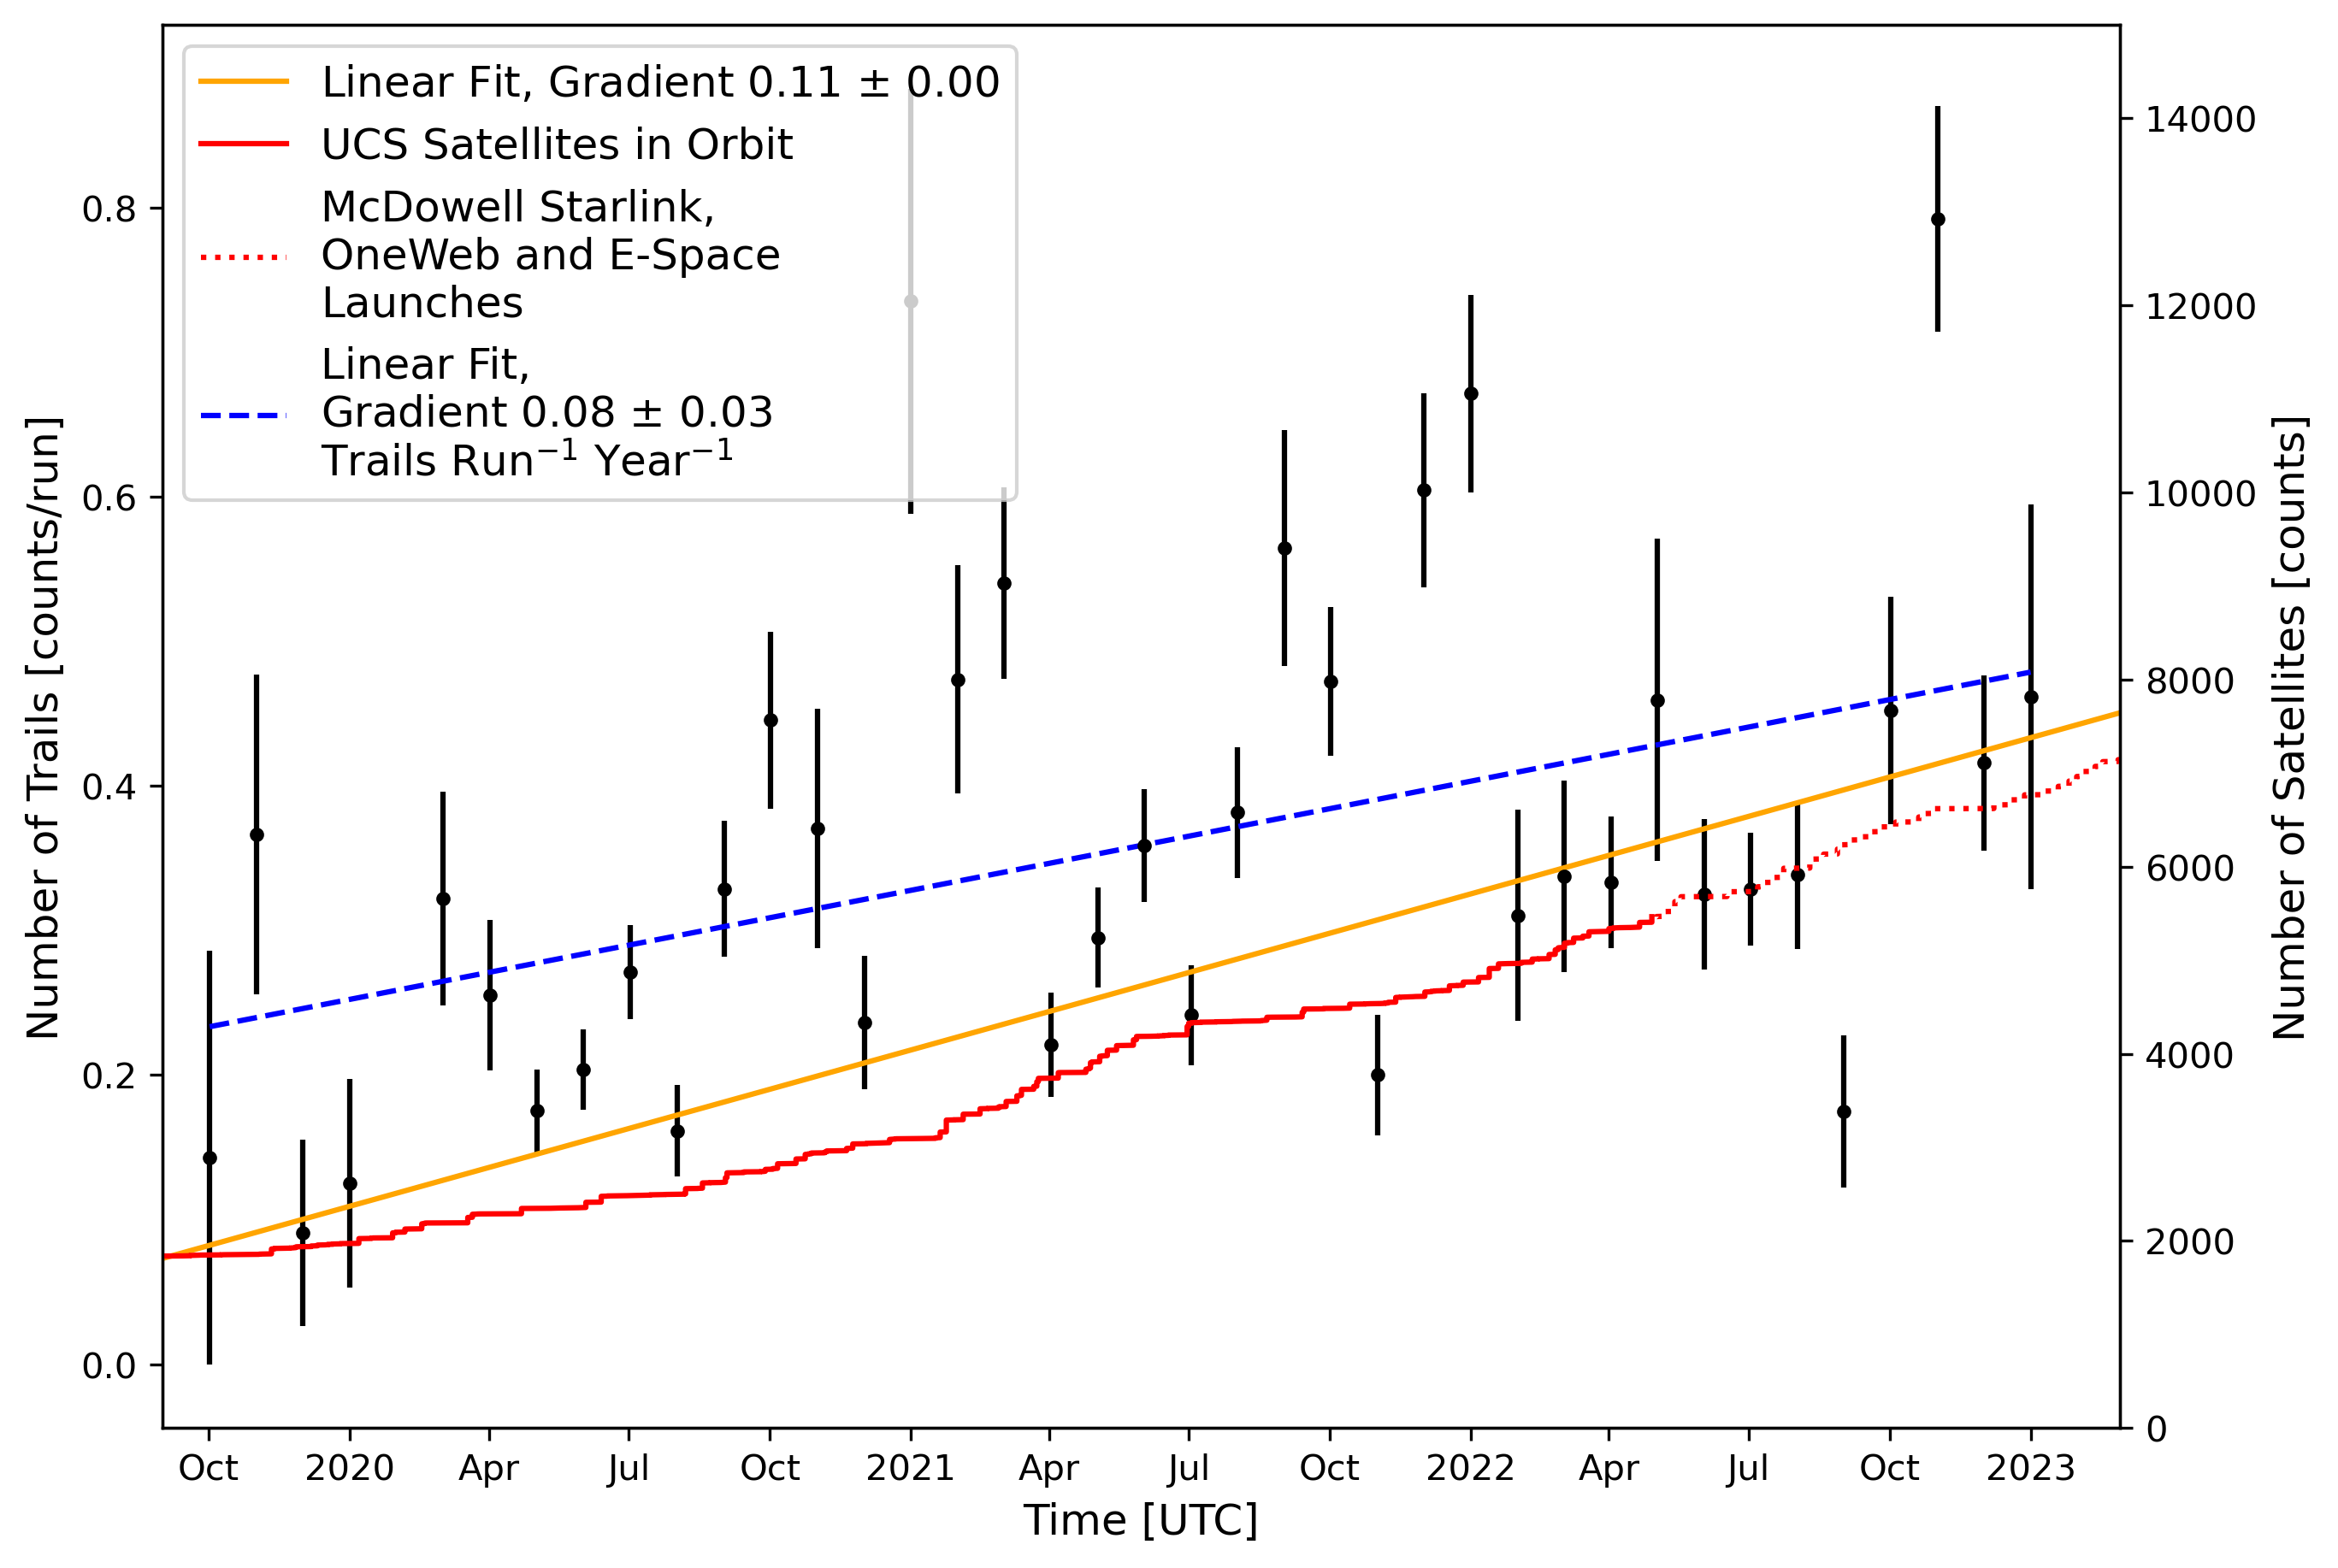

In [4]:
figure_size = (9,6)

fig1, ax1 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
#plt.rcParams['date.converter'] = 'concise'
plt.rcParams['date.converter'] = 'concise'
ax1.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=12, maxticks=20))
N_runs,b = np.histogram(np.unique(t), bins = np.arange(2019,2023.5,0.08333333))# Runs per month
N_trails,d = np.histogram(t[mask_N], bins = np.arange(2019,2023.5,0.08333333))# Trails per month
mask_zeros = N_trails >0
N_trails = N_trails[mask_zeros]
N_runs = N_runs[mask_zeros]
print(N_runs)
b = b[:-1][mask_zeros]
b = Time(b, format = "decimalyear")
b.format = "datetime"
b = b.value
err = N_trails/N_runs/np.sqrt(N_trails)
b=np.delete(b,4)
N_trails=np.delete(N_trails,4)
N_runs=np.delete(N_runs,4)
err=np.delete(err,4)
ax1.scatter(b[:-1], N_trails[:-1]/N_runs[:-1], s = 5)
ax1.errorbar(b[:-1], N_trails[:-1]/N_runs[:-1], yerr = err[:-1], fmt=".k", label = "Trails per Run")
ax1.set_xlabel("Time [UTC]")
ax1.set_ylabel("Number of Trails [counts/run]")
ax1.set_xlim([datetime(2019, 9,1), datetime(2023, 2, 28)])
months = Time(b, format ="datetime")
months.format = "decimalyear"
popt, pcov = scipy.optimize.curve_fit(lin, months[:-1].value,  N_trails[:-1]/N_runs[:-1])
ax1.plot(b[:-1], lin(months.value, popt[0], popt[1])[:-1], c = "blue", 
           label = "Linear Fit, \nGradient {:.2f}".format(popt[0])+" $\pm$ {:.2f}".format(np.sqrt(np.diag(pcov))[0])+'\nTrails Run$^{-1}$ Year$^{-1}$',linestyle='dashed' )#+
#            ", \nIntercept {:.0f}".format(popt[1])+" $\pm$ {:.0f}".format(np.sqrt(np.diag(pcov))[1]))
ax1_2 = ax1.twinx()
ax1_2.plot(np.sort(dates_all_sats.value), np.arange(1, len(dates_all_sats)+1), 
           label = "UCS Satellites in Orbit", c = "red")
ax1_2.plot(launch_all[mask_dates_all_sats].value,
           np.arange(len(dates_all_sats.value),
                     len(launch_all[mask_dates_all_sats])+len(dates_all_sats)),
           label = "McDowell Starlink,\nOneWeb and E-Space\nLaunches", c = "red", ls = "dotted")

xvals=np.concatenate([np.sort(dates_all_sats.value),launch_all[mask_dates_all_sats].value])[1800:]
xvals2=xvals.copy()
yvals=np.concatenate([np.arange(1, len(dates_all_sats)+1),np.arange(len(dates_all_sats.value),len(launch_all[mask_dates_all_sats])+len(dates_all_sats))])[1800:]
yvals=yvals*np.amax(lin(months.value, popt[0], popt[1])[:-1])/np.amax(yvals)
yvals2=lin(months.value, popt[0], popt[1])[:-1]
xvals = Time(xvals, format ="datetime")

xvals.format = "decimalyear"

popt2, pcov2 = scipy.optimize.curve_fit(lin, xvals.value, yvals)

print(popt2)
print('Linear fit to satellite data: ',popt2,np.sqrt(np.diag(pcov2)))
ax1.plot(xvals2, lin(xvals.value, popt2[0], popt2[1]), c = "orange",label = "Linear Fit, Gradient {:.2f}".format(popt2[0])+" $\pm$ {:.2f}".format(np.sqrt(np.diag(pcov2))[0]) )#+", \nIntercept {:.0f}".format(popt[1])+" $\pm$ {:.0f}".format(np.sqrt(np.diag(pcov))[1])
yvals3=np.interp(months[:-1].value,xvals.value,yvals)
print(yvals2,yvals3)
print(len(yvals),len(yvals2),len(yvals3))
print(scipy.stats.pearsonr(N_trails[:-1]/N_runs[:-1],yvals3))

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_2.get_legend_handles_labels()

ax1_2.legend(tuple([lines[1]]+list(lines2)+[lines[0]]), tuple([labels[1]]+list(labels2)+[labels[0]]), loc='upper left',
             fancybox=True,
             ncol=1) # bbox_to_anchor=(0.5, -0.1),
ax1_2.set_ylabel("Number of Satellites [counts]")
ax1_2.set_ylim(0,15000)
print(os.path.join(path_to_plots,"Avg_trails_all_runs.jpg"))
fig1.savefig(os.path.join(path_to_plots,"Avg_trails_all_runs.jpg"))

figure_size = (6,3)

The fitted straight line has equation y = 0.1x -153.5
R² = 0.30


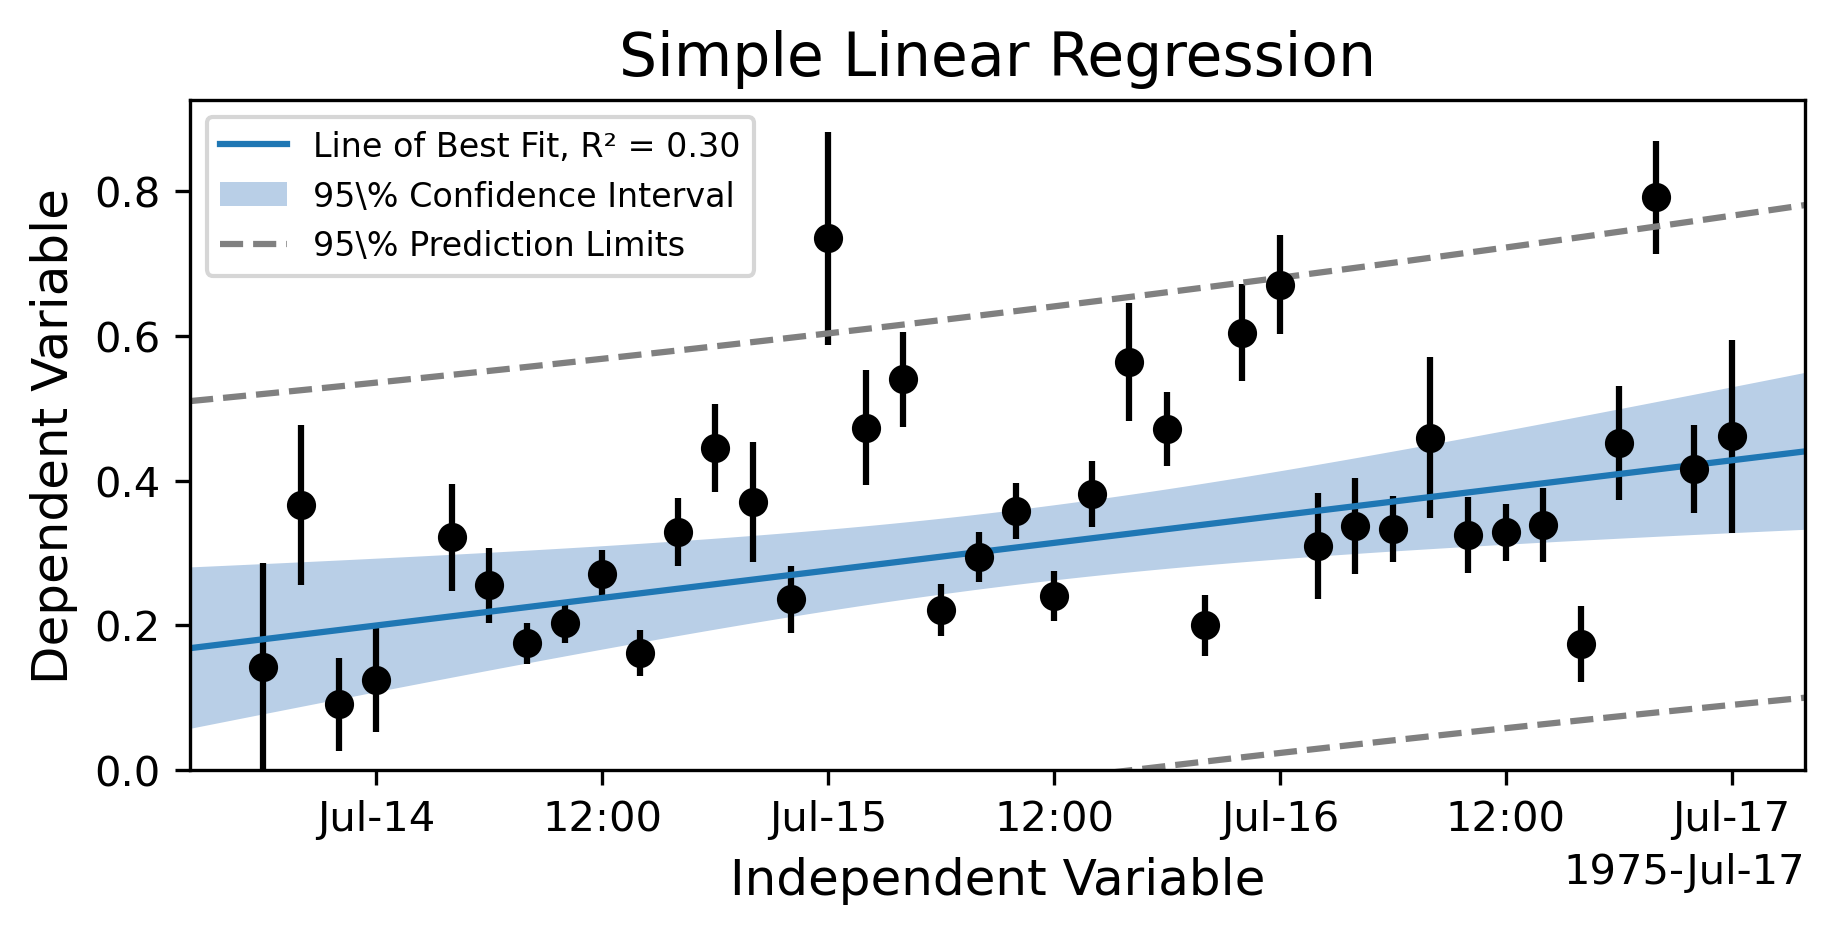

In [5]:
from scipy import stats
y=N_trails[:-1]/N_runs[:-1]
x=months[:-1].value
w=1/err[:-1]

fig, ax = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)

deg = 1
# Parameters from the fit of the polynomial
p = np.polyfit(x, y, deg,w=w)
m = p[0]  # Gradient
c = p[1]  # y-intercept

print(f'The fitted straight line has equation y = {m:.1f}x {c:=+6.1f}')
# Number of observations
n = y.size
# Number of parameters: equal to the degree of the fitted polynomial (ie the
# number of coefficients) plus 1 (ie the number of constants)
m = 2
# Degrees of freedom (number of observations - number of parameters)
dof = n - m
# Significance level
alpha = 0.05
# We're using a two-sided test
tails = 2
# The percent-point function (aka the quantile function) of the t-distribution
# gives you the critical t-value that must be met in order to get significance
t_critical = stats.t.ppf(1 - (alpha / tails), dof)

# Model the data using the parameters of the fitted straight line
y_model = np.polyval(p, x)

# Create the linear (1 degree polynomial) model
model = np.poly1d(p)
# Fit the model
y_model = model(x)

# Mean
y_bar = np.mean(y)
# Coefficient of determination, R²
R2 = np.sum((y_model - y_bar)**2) / np.sum((y - y_bar)**2)

print(f'R² = {R2:.2f}')

# Calculate the residuals (the error in the data, according to the model)
resid = y - y_model
# Chi-squared (estimates the error in data)
chi2 = sum((resid / y_model)**2)
# Reduced chi-squared (measures the goodness-of-fit)
chi2_red = chi2 / dof
# Standard deviation of the error
std_err = np.sqrt(sum(resid**2) / dof)

# Create plot
plt.errorbar(x, y,yerr=err[:-1], c='black', marker='o',linestyle='None')
xlim = plt.xlim()
ylim = plt.ylim()
# Line of best fit
plt.plot(np.array(xlim), p[1] + p[0] * np.array(xlim), label=f'Line of Best Fit, R² = {R2:.2f}')
# Fit
x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)
# Confidence interval
ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
plt.fill_between(
    x_fitted, y_fitted + ci, y_fitted - ci, facecolor='#b9cfe7', zorder=0,
    label=r'95\% Confidence Interval'
)
# Prediction Interval
pi = t_critical * std_err * np.sqrt(1 + 1 / n + (x_fitted - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
plt.plot(x_fitted, y_fitted - pi, '--', color='0.5', label=r'95\% Prediction Limits')
plt.plot(x_fitted, y_fitted + pi, '--', color='0.5')
# Title and labels
#ax1=plt.gca()
ax.set_xlabel("Time")
ax.set_ylabel("Number of Trails [counts/run]")
ax.set_xlim([datetime(2019, 9,1), datetime(2023, 2, 28)])
months = Time(b, format ="datetime")
months.format = "decimalyear"

plt.title('Simple Linear Regression')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
# Finished
plt.legend(fontsize=8)
plt.xlim(xlim)
plt.ylim(0, ylim[1])
plt.show()

<ErrorbarContainer object of 3 artists>

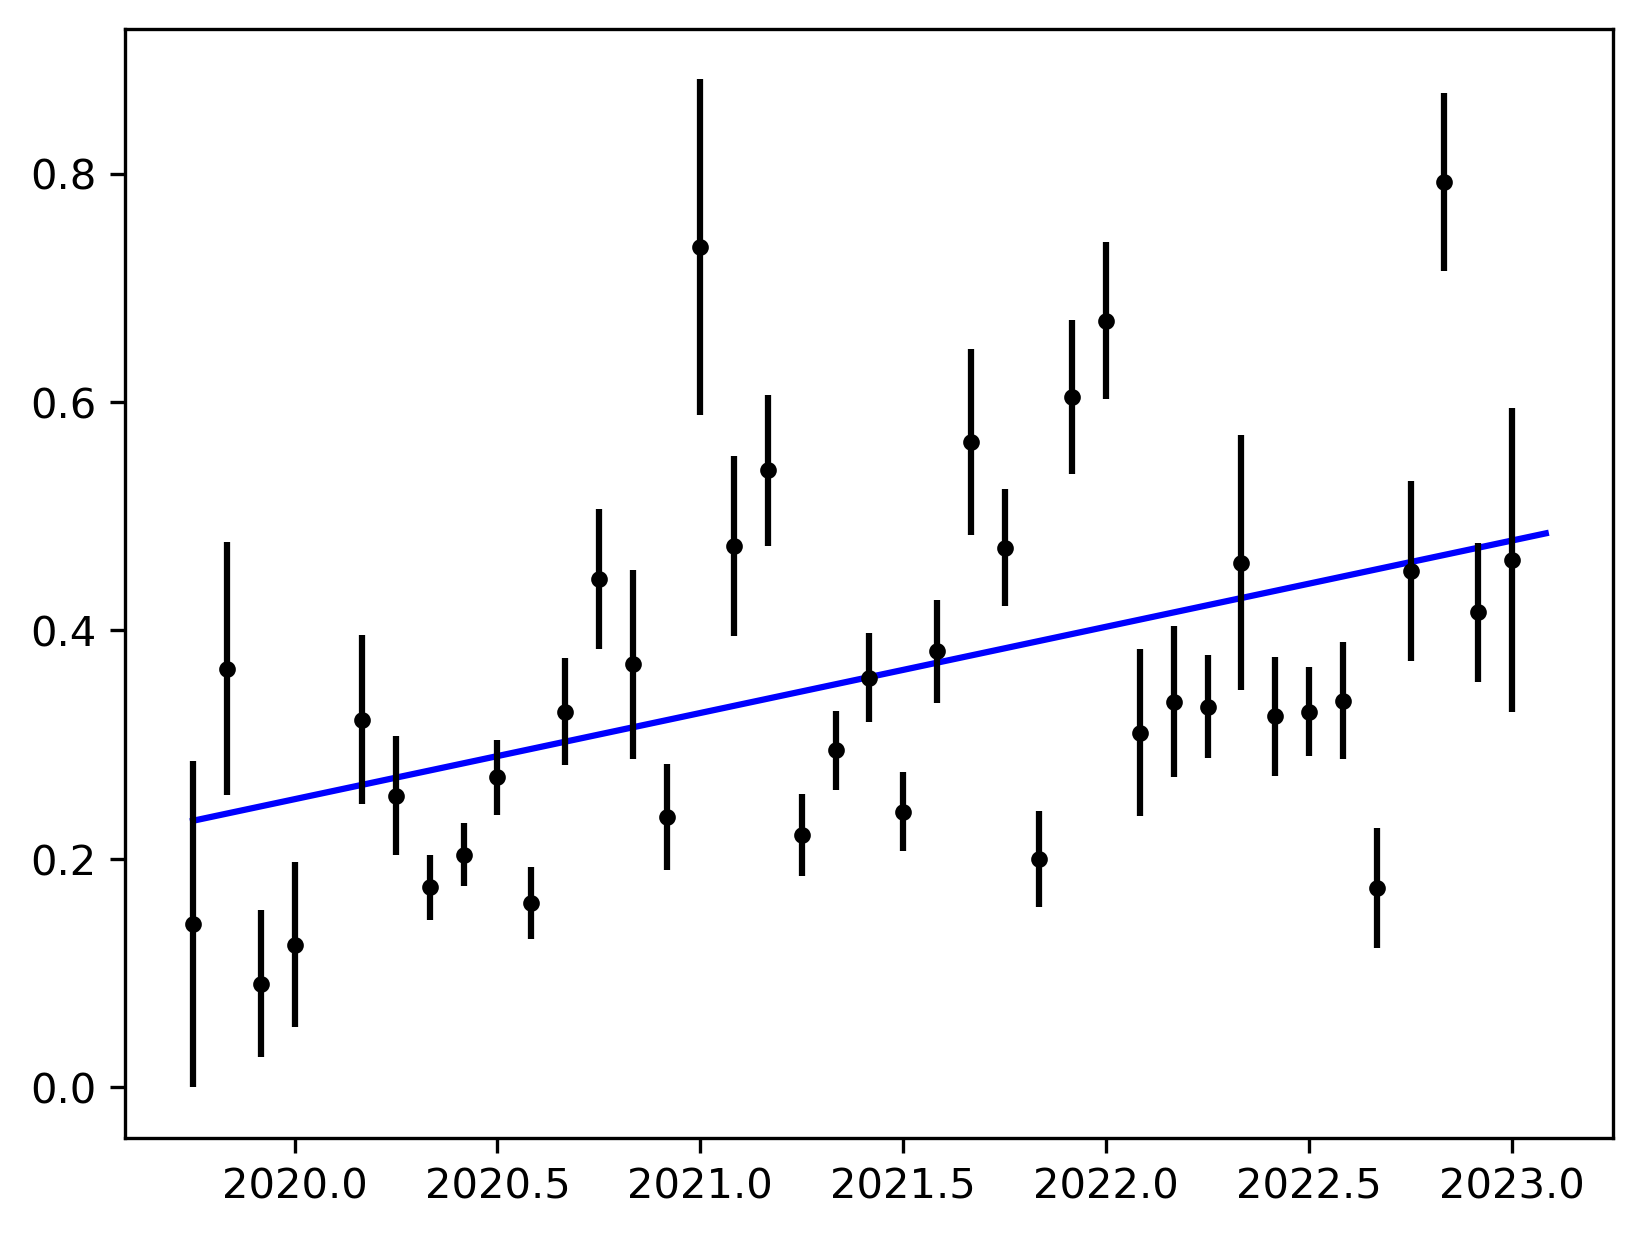

In [6]:
plt.plot(months.value, lin(months.value, popt[0], popt[1]), c = "blue", 
           label = "m = {:.2f}".format(popt[0])+"$\pm$ {:.2f}".format(np.sqrt(np.diag(pcov))[0])+
           ", t ={:.0f}".format(popt[1])+"$\pm$ {:.0f}".format(np.sqrt(np.diag(pcov))[1]))

plt.errorbar(months.value[:-1], N_trails[:-1]/N_runs[:-1], yerr = err[:-1], fmt=".k", label = "Trails per run")


In [7]:
counter_of_plots = 0

# plt.close()

# counter_of_plots = 0
# counter_of_plots+=1
# print(counter_of_plots,"Plots created")

# fig1_1, ax1_1 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
# plt.rcParams['date.converter'] = 'concise'
# ax1_1.xaxis.set_major_locator(mdates.AutoDateLocator(minticks=12, maxticks=20))
# N_runs,b = np.histogram(np.unique(t[mask_N]), bins = np.arange(2019,2023.5,0.08333333))# Runs per month
# N_trails,d = np.histogram(t[mask_N], bins = np.arange(2019,2023.5,0.08333333))# Trails per month
# mask_zeros = N_trails >0
# N_trails = N_trails[mask_zeros]
# N_runs = N_runs[mask_zeros]
# b = b[:-1][mask_zeros]
# b = Time(b, format = "decimalyear")
# b.format = "datetime"
# b = b.value
# err = N_trails/N_runs/np.sqrt(N_trails)
# ax1_1.scatter(b, N_trails/N_runs, s = 5)
# ax1_1.errorbar(b, N_trails/N_runs, yerr = err, fmt=".k")
# ax1_1.set_xlabel("Time [year]")
# ax1_1.set_ylabel("Number of Trails [counts/run]") 
# #ax1_1.set_title("Only runs with trails")  
# fig1_1.savefig(os.path.join(path_to_plots,"Avg_trails_runs_with_trails.jpg"))
# plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


'''
fig2, ax2 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
c,d,e = np.histogram2d(t, prop_dict["N_track"], 
                       bins = [np.arange(2019,2023.5, 0.08333333), np.arange(0,np.max(prop_dict["N_track"])+1)])
X,Y = np.meshgrid(d,e)
for i in range(len(c)):
    c[i]=c[i]/a_new[i]
c=c.T
plt.pcolormesh(X,Y,c, cmap = "gist_heat_r")
plt.xlabel("Year")
plt.ylabel("N-tracks")
plt.colorbar(label = "Runs with N tracks per nruns in month")
plt.title("")
plt.xlim((2019.75,2022.75))
fig2.savefig(os.path.join(path_to_plot,"n_tracks_hist2d.jpg"))
plt.close()
'''

fig3, ax3 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
dur_bins = np.logspace(np.log10(np.min(prop_dict["duration"][mask_N])), np.log10(np.max(prop_dict["duration"])), 20 )
a,b = np.histogram(prop_dict["duration"][mask_N], bins =dur_bins)
bin_avg = (b[:-1]+b[1:])/2
#ax3.scatter(bin_avg,a)
for i in range(len(bin_avg)):
    ax3.hlines(y = a[i], xmin = b[i], xmax = b[i+1], color = "black")

ax3.errorbar(bin_avg,a, yerr = np.sqrt(a), fmt=".k", color = "black" )
ax3.set_xlabel("Duration [s]")
ax3.set_ylabel("Number of Trails [counts]")
#ax3.set_title("Histogram durations")
xticks = np.array([5,10,20,50,100,200])
ax3.set_xscale("log")
ax3.set_xticks(xticks)
xticks_label = xticks.astype("str")
ax3.set_xticklabels(xticks_label)
fig3.savefig(os.path.join(path_to_plots,"hist_durations.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig4, ax4 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
v_max = np.max(prop_dict["velocity"])
v_step = v_max/len(dur_bins)
v_bins = np.arange(0,v_max+0.05, 0.05)
a,b = np.histogram(prop_dict["velocity"], bins = v_bins)
bin_avg = (b[:-1]+b[1:])/2
#ax4.scatter(b[:-1], a)
ax4.errorbar(bin_avg, a, yerr = np.sqrt(a), xerr = round((bin_avg[1]-bin_avg[0])/2,3), fmt = ".k")
ax4.set_xlabel("Velocity [$^\circ$/s]")
ax4.set_ylabel("Number of Trails [counts]")
#ax4.set_title("Histogram velocities")
fig4.savefig(os.path.join(path_to_plots,"hist_velocity.jpg"))
plt.close()


counter_of_plots+=1
print(counter_of_plots,"Plots created")

fig4_2, ax4_2 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
v_max = np.max(prop_dict["velocity"])
v_step = v_max/(len(dur_bins)-1)
v_bins = np.arange(0,v_max+v_step, v_step)
a,b,c = np.histogram2d(prop_dict["duration"][mask_N], prop_dict["velocity"][mask_N],
                       bins = [dur_bins, v_bins])
X,Y = np.meshgrid(b,c)
a = a.T
ax4_2.pcolormesh(X,Y,a)#, cmap = "gist_heat_r")
ax4_2.set_xlabel("Duration [s]")
ax4_2.set_ylabel("Velocity [$^\circ$/s]")
#ax4_2.set_title("Duration-velocity distribution")
xticks = np.array([5,10,20,50,100,200])
ax4_2.set_xscale("log")
ax4_2.set_xticks(xticks)
xticks_label = xticks.astype("str")
ax4_2.set_xticklabels(xticks_label)
fig4_2.colorbar(ax4_2.pcolormesh(X,Y,a), label = "Number of Trails [counts]")
fig4_2.savefig(os.path.join(path_to_plots,"hist_2D_dur_v.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig4_3, ax4_3 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
v_max = np.max(prop_dict["velocity"])
v_step = v_max/(len(dur_bins)-1)
v_bins = np.arange(0,v_max+v_step, v_step)
pix_bins = np.logspace(np.log10(np.min(prop_dict["unique_pix"][mask_N])), 
                       np.log10(np.max(prop_dict["unique_pix"])), 20 )
a,b,c = np.histogram2d(prop_dict["unique_pix"][mask_N], prop_dict["velocity"][mask_N],
                       bins = [pix_bins, v_bins])
X,Y = np.meshgrid(b,c)
a = a.T
ax4_3.pcolormesh(X,Y,a)#, cmap = "gist_heat_r")
ax4_3.set_xlabel("Unique Pixels [counts]")
ax4_3.set_ylabel("Velocity [m/s]") 
xticks = np.array([5,10,20,50,100,200])
ax4_3.set_xscale("log")
ax4_3.set_xticks(xticks)
xticks_label = xticks.astype("str")
ax4_3.set_xticklabels(xticks_label)
fig4_3.colorbar(ax4_3.pcolormesh(X,Y,a), label = "Number of Trails [counts]")
fig4_3.savefig(os.path.join(path_to_plots,"hist_2D_pix_v.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")

fig4_4, ax4_4 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
pix_bins = np.logspace(np.log10(np.min(prop_dict["unique_pix"][mask_N])), 
                       np.log10(np.max(prop_dict["unique_pix"])), 20 )
a,b,c = np.histogram2d(prop_dict["unique_pix"][mask_N], prop_dict["duration"][mask_N],
                       bins = [pix_bins, dur_bins])
X,Y = np.meshgrid(b,c)
a = a.T
ax4_4.pcolormesh(X,Y,a)#, cmap = "gist_heat_r")
ax4_4.set_xlabel("Unique pixels [counts]")
ax4_4.set_ylabel("Duration [s]")
xticks = np.array([5,10,20,50,100,200])
ax4_4.set_xscale("log")
ax4_4.set_xticks(xticks)
ax4_4.set_yscale("log")
ax4_4.set_yticks(xticks)
xticks_label = xticks.astype("str")
ax4_4.set_yticklabels(xticks_label)
ax4_4.set_xticklabels(xticks_label)
fig4_4.colorbar(ax4_4.pcolormesh(X,Y,a), label = "Number of Trails [counts]")
fig4_4.savefig(os.path.join(path_to_plots,"hist_2D_pix_dur.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig4_5, ax4_5 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
v_max = np.max(prop_dict["velocity"])
v_step = v_max/(len(dur_bins)-1)
v_bins = np.arange(0,v_max+v_step, v_step)
bright_bins_lin = np.arange(900, np.max(prop_dict["avg_brightness"]), 200) 
a,b,c = np.histogram2d(prop_dict["duration"][mask_N], prop_dict["avg_brightness"][mask_N],
                       bins = [dur_bins, bright_bins])
X,Y = np.meshgrid(b,c)
a = a.T
ax4_5.pcolormesh(X,Y,a)#, cmap = "gist_heat_r")
ax4_5.set_xlabel("Duration [s]")
ax4_5.set_ylabel("Average Brightness [MHz]")
#ax4_2.set_title("Duration-velocity distribution")
xticks = np.array([5,10,20,50,100,200])
ax4_5.set_xscale("log")
ax4_5.loglog()
ax4_5.set_xticks(xticks)
xticks_label = xticks.astype("str")
ax4_5.set_xticklabels(xticks_label)
yticks = np.array([1000,2000, 5000])
ax4_5.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax4_5.set_yticklabels(yticks_label)
ax4_5.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax4_5.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())                                                                                            
ax4_5.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
ax4_5.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
fig4_5.colorbar(ax4_5.pcolormesh(X,Y,a), label = "Number of Trails [counts]")
fig4_5.savefig(os.path.join(path_to_plots,"hist_2D_dur_bright.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


'''
#Width is not implemented yet
fig5 = plt.figure(figsize=figure_size)
bins_w = np.arange(0,np.max(prop_dict["width"]), 0.01)
plt.hist(prop_dict["width"], bins =bins_w)
plt.xlabel("w [pix]")
plt.ylabel("N")
plt.xlim((0,np.max(bins_w)))
plt.title("Histogram Widths")
fig5.savefig(path_to_plots+"hist_velocity.jpg")
plt.close()
'''

fig6, ax6 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
pix_bins = np.logspace(np.log10(np.min(prop_dict["unique_pix"][mask_N])), 
                       np.log10(np.max(prop_dict["unique_pix"])), 20 )
a,b = np.histogram(prop_dict["unique_pix"], bins =pix_bins)
bin_avg = (b[:-1]+b[1:])/2
ax6.errorbar(bin_avg, a, yerr = np.sqrt(a),fmt = ".k")
for i in range(len(bin_avg)):
    ax6.hlines(y = a[i], xmin = b[i], xmax = b[i+1], color = "black")

ax6.set_xlabel("Unique Pixels [counts]")
ax6.set_ylabel("Number of Trails [counts]")
ax6.set_xscale("log")
#ax6.set_title("Histogram pixels per trail")   
xticks = np.array([5,10,20,50,100,200])
ax6.set_xscale("log")
ax6.set_xticks(xticks)
xticks_label = xticks.astype("str")
ax6.set_xticklabels(xticks_label)
fig6.savefig(os.path.join(path_to_plots,"hist_unique_pix.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


'''
fig7, ax7 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
TIN = prop_dict["time_in_night"]/3600
for i in range(len(TIN)):
    if TIN[i]>12:
        TIN[i] = TIN[i]-24

TIN_bins = np.arange(int(np.min(TIN[mask_N]))-1, int(np.max(TIN[mask_N])+2))
a,b = np.histogram(prop_dict["zenith"][index_first_run], bins = np.arange(0,np.max(prop_dict["zenith"]),5))
#a accounts for every run, whether a trail was detected or not
c,d,e = np.histogram2d(prop_dict["zenith"][mask_N], TIN[mask_N],
                       bins = [zenith_bins, TIN_bins])
#c takes only Trails [counts] into account 
a_2, b_2 = np.histogram(TIN[index_first_run], bins = TIN_bins)
X,Y = np.meshgrid(d,e)
for i in range(len(c)):
    c[i] = c[i]/a[i] #Number of Trails [counts] per zenith angle range
    #c[i] = c[i]/a_2[i] #Number of Trails [counts] per time in night

c=c.T
im7 = ax7.pcolormesh(X,Y,c)#, cmap = "gist_heat_r")
ax7.set_xlabel("Zenith [deg]")
ax7.set_ylabel("Time_in_night [h]")
ax7.set_yticks(np.arange(-6,6,2))
ax7.set_yticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
fig7.colorbar(im7, label = "Average number of Trails [counts]")
#ax7.set_title("2D-histogram of time in night vs. average number of Trails [counts]")
fig7.savefig(path_to_plots+"time_in_night_zenith_hist2d_relative.jpg")
plt.close()


fig7_2, ax7_2 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
TIN = prop_dict["time_in_night"]/3600
for i in range(len(TIN)):
    if TIN[i]>12:
        TIN[i] = TIN[i]-24

TIN_bins = np.arange(int(np.min(TIN[mask_N]))-1, int(np.max(TIN[mask_N])+2))
a,b = np.histogram(prop_dict["zenith"][index_first_run], bins = np.arange(0,np.max(prop_dict["zenith"]),5))
#a accounts for every run, whether a trail was detected or not
c,d,e = np.histogram2d(prop_dict["zenith"][mask_N], TIN[mask_N],
                           bins = [zenith_bins, TIN_bins])
#c takes only Trails [counts] into account
c_err = np.sqrt(c) #Poissonian error
X,Y = np.meshgrid(d,e)
for i in range(len(c_err)):
    c_err[i] = c_err[i]/a[i] #Number of Trails [counts] per zenith angle range

c_err=c_err.T
im7_2 = ax7_2.pcolormesh(X,Y,c_err)#, cmap = "gist_heat_r")
ax7_2.set_xlabel("Zenith [deg]")
ax7_2.set_ylabel("Time_in_night [h]")
ax7_2.set_yticks(np.arange(-6,6,2))
ax7_2.set_yticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
fig7_2.colorbar(im7_2, label = "Error of number of Trails [counts] per zenith range")
ax7_2.set_title("2D-histogram of errors of time in night vs. average number of Trails [counts]")
fig7_2.savefig(path_to_plots+"time_in_night_zenith_hist2d_relative_err.jpg")
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")

'''


#Idea: Find entry indices corresponding to each normalized bin
fig8_03, ax8_03 = plt.subplots(1,1,figsize = figure_size, constrained_layout = True)
a,b,c = np.histogram2d(prop_dict["zenith"][mask_N], TIN[mask_N],
                           bins = [zenith_bins, TIN_bins])
X,Y = np.meshgrid(b,c)
im8_03 = ax8_03.pcolormesh(X,Y, a.T)
ax8_03.set_xlabel("Zenith angle [$^\circ$]")
ax8_03.set_ylabel("Time in night [UTC]")
ax8_03.set_yticks(np.arange(-6,6,2))
ax8_03.set_yticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
fig8_03.colorbar(im8_03, label = "Number of Trails [counts]")
fig8_03.savefig(os.path.join(path_to_plots,"zenith_TIN_trails.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig8_03_2, ax8_03_2 = plt.subplots(1,1,figsize = figure_size, constrained_layout = True)
a,b,c = np.histogram2d(prop_dict["zenith"][index_first_run], TIN[index_first_run],
                           bins = [zenith_bins, TIN_bins])
X,Y = np.meshgrid(b,c)
im8_03_2 = ax8_03_2.pcolormesh(X,Y, a.T)
ax8_03_2.set_xlabel("Zenith angle [$^\circ$]")
ax8_03_2.set_ylabel("Time in night [UTC]")
ax8_03_2.set_yticks(np.arange(-6,6,2))
ax8_03_2.set_yticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
fig8_03_2.colorbar(im8_03_2, label = "Number of runs")
fig8_03_2.savefig(os.path.join(path_to_plots,"zenith_TIN_runs.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")




fig8_04, ax8_04 = plt.subplots(1,1,figsize = figure_size, constrained_layout = True)
a,b,c = np.histogram2d(prop_dict["zenith"][mask_N], TIN[mask_N],
                           bins = [zenith_bins, TIN_bins])
x,y,z = np.histogram2d(prop_dict["zenith"][index_first_run], TIN[index_first_run],
                           bins = [zenith_bins, TIN_bins])
X,Y = np.meshgrid(b,c)
im8_04 = ax8_04.pcolormesh(X,Y, (a/x).T, norm = mpl.colors.LogNorm(), cmap = "viridis")
ax8_04.set_xlabel("Zenith angle [$^\circ$]")
ax8_04.set_ylabel("Time in night [UTC]")
ax8_04.set_yticks(np.arange(-6,6,2))
ax8_04.set_yticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
cbar8_04 = fig8_04.colorbar(im8_04, label = "Number of Trails [counts/run]", 
                            ticks = [0.01,0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5])
cbar8_04.ax.set_yticklabels(np.array([0.01,0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5]).astype(str))
fig8_04.savefig(os.path.join(path_to_plots,"zenith_TIN_normed.jpg"))
plt.close()


counter_of_plots+=1
print(counter_of_plots,"Plots created")




fig8, ax8 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
ax8.set_xticks(np.arange(-6,6,2))
ax8.set_xticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
ax8.hist(TIN[mask_N], bins = TIN_bins)
ax8.set_xlabel("Trail time [UTC]")
ax8.set_ylabel("Number of trails")
#ax8.set_title("Number of tracks")
fig8.savefig(os.path.join(path_to_plots,"TIN_hist_trails.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig8_2, ax8_2 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
ax8_2.set_xticks(np.arange(-6,6,2))
ax8_2.set_xticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
ax8_2.hist(TIN[index_first_run], bins = TIN_bins)
ax8_2.set_xlabel("Run Start Time [UTC]")
ax8_2.set_ylabel("Number of runs")
#ax8_2.set_title("Number of runs per hour of night") 
fig8_2.savefig(os.path.join(path_to_plots,"TIN_hist_runs.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig8_3, ax8_3 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
a,b = np.histogram(TIN[index_first_run], bins = TIN_bins)
c,d = np.histogram(TIN[mask_N], bins = TIN_bins)
bin_avg = (b[:-1]+b[1:])/2
ax8_3.errorbar(bin_avg, c/a, xerr = 0.5 , yerr = np.sqrt(c)/a, fmt = ".k")
ax8_3.set_xticks(np.arange(-6,6,2))
ax8_3.set_xticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
ax8_3.set_xlabel("Run Start Time [UTC]")
ax8_3.set_ylabel("Average number of trails")
#ax8_3.set_title("Number of runs per hour of night")
fig8_3.savefig(os.path.join(path_to_plots,"TIN_hist_average.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig10, ax10 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
ax10.hist(prop_dict["zenith"][mask_N], bins = zenith_bins)
ax10.set_xlabel("Zenith [$^\circ$]")
ax10.set_ylabel("Number of trails")
#ax10.set_title("Number of trails")
fig10.savefig(os.path.join(path_to_plots,"zenith_hist_trails.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig10_2, ax10_2 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
ax10_2.hist(prop_dict["zenith"][index_first_run], bins = zenith_bins)
ax10_2.set_xlabel("Zenith [$^\circ$]")
ax10_2.set_ylabel("Number of runs")
#ax10_2.set_title("Number of runs")
fig10_2.savefig(os.path.join(path_to_plots,"zenith_hist_runs.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig11, ax11 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
a,b = np.histogram(prop_dict["zenith"][mask_N], bins = zenith_bins)
c,d = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
bin_avg = (b[:-1]+b[1:])/2
ax11.errorbar(bin_avg, a/c, xerr = 2.5, yerr = np.sqrt(a)/c, fmt=".k")
ax11.set_xlabel("Zenith [$^\circ$]")
ax11.set_ylabel("Average number of trails")
#ax11.set_title("Average number of trails per run")
fig11.savefig(os.path.join(path_to_plots,"zenith_hist_average.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")



fig12, ax12 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hist_zenith_dur = []
for i in range(len(zenith_bins)-1):
    mask_zenith_bin = np.logical_and(prop_dict["zenith"][mask_N]>=zenith_bins[i], prop_dict["zenith"][mask_N]<zenith_bins[i+1])
    a,b = np.histogram(prop_dict["duration"][mask_N][mask_zenith_bin], bins =dur_bins)
    hist_zenith_dur.append(a)

X,Y = np.meshgrid(zenith_bins, dur_bins)
im12 = ax12.pcolormesh(X,Y,np.array(hist_zenith_dur).T)
ax12.set_xlabel("Zenith [$^\circ$]")
ax12.set_ylabel("Duration [s]")
ax12.set_yscale("log")
yticks = np.array([5,10,20,50,100])
ax12.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax12.set_yticklabels(yticks_label)
fig12.colorbar(im12, label = "Number of Trails [coucts]")
fig12.savefig(os.path.join(path_to_plots,"hist_2D_zenith_duration.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig13, ax13 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hist_zenith_dur = []
c,d = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
for i in range(len(zenith_bins)-1):
    mask_zenith_bin = np.logical_and(prop_dict["zenith"][mask_N]>=zenith_bins[i], prop_dict["zenith"][mask_N]<zenith_bins[i+1])
    a,b = np.histogram(prop_dict["duration"][mask_N][mask_zenith_bin], bins =dur_bins)
    hist_zenith_dur.append(a/c[i])

X,Y = np.meshgrid(zenith_bins, dur_bins)
im13 = ax13.pcolormesh(X,Y,np.array(hist_zenith_dur).T)
ax13.set_xlabel("Zenith [$^\circ$]")
ax13.set_ylabel("Duration [s]")
ax13.set_yscale("log")
yticks = np.array([5,10,20,50,100])
ax13.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax13.set_yticklabels(yticks_label)
fig13.colorbar(im13, label = "Rate of Trails [counts/run]")
fig13.savefig(os.path.join(path_to_plots,"hist_2D_zenith_duration_rate.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")

fig14_0, ax14_0 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
bright_bins = np.logspace(np.log10(900), np.log10(np.max(prop_dict["avg_brightness"])), 20 )
ax14_0.set_xlabel("Brightness [MHz]")
ax14_0.set_ylabel("Number of Trails [counts]")
a,b = np.histogram(prop_dict["avg_brightness"][mask_N], bins = bright_bins)
bin_avg = (b[:-1]+b[1:])/2
ax14_0.errorbar(bin_avg,a,  yerr = np.sqrt(a), fmt = ".k")
for i in range(len(bin_avg)):
    ax14_0.hlines(y = a[i], xmin = b[i], xmax = b[i+1], color = "black")

ax14_0.set_xscale("log")
ax14_0.set_yscale("log")
xticks = np.array([1000, 2000, 5000, 10000])
yticks = np.array([1,2,5,0,20,50, 100, 200])
ax14_0.set_xticks(xticks)
ax14_0.set_yticks(yticks)
xticks_label = xticks.astype("str")
ax14_0.set_xticklabels(xticks_label)
yticks_label = yticks.astype("str")
ax14_0.set_yticklabels(yticks_label)
fig14_0.savefig(os.path.join(path_to_plots,"hist_brightness.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")



fig14, ax14 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
a,b,c = np.histogram2d(prop_dict["zenith"][mask_N], prop_dict["avg_brightness"][mask_N],
                       bins = [zenith_bins, bright_bins])
X,Y = np.meshgrid(zenith_bins, bright_bins)
im14 = ax14.pcolormesh(X,Y,a.T)
ax14.set_xlabel("Zenith [$^\circ$]")
ax14.set_ylabel("Brightness [MHz]")
ax14.set_yscale("log")
yticks = np.array([1000,2000, 3000,4000, 6000])
ax14.set_yticks(yticks)
yticks_label = yticks.astype("str")
old_label = ax14.get_yticklabels()
ax14.set_yticklabels([""]*len(old_label))
print(old_label) 
ax14.set_yticklabels(yticks_label)
#ax14.set_ylim((900, np.max(prop_dict["avg_brightness"])))
fig14.colorbar(im14, label = "Number of Trails [counts]")
fig14.savefig(os.path.join(path_to_plots,"hist_2D_zenith_brightness.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")


fig14_1, ax14_1 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hist_zenith_bright = []
c,d = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
for i in range(len(zenith_bins)-1):
    mask_zenith_bin = np.logical_and(prop_dict["zenith"][mask_N]>=zenith_bins[i],
                            prop_dict["zenith"][mask_N]<zenith_bins[i+1])
    a,b = np.histogram(prop_dict["avg_brightness"][mask_N][mask_zenith_bin], bins =bright_bins)
    hist_zenith_bright.append(a/c[i])

X,Y = np.meshgrid(zenith_bins, bright_bins)
im14_1 = ax14_1.pcolormesh(X,Y,np.array(hist_zenith_bright).T)
ax14_1.set_xlabel("Zenith [$^\circ$]")
ax14_1.set_ylabel("Brightness [MHz]")
ax14_1.set_yscale("log")
yticks = np.array([1000,2000,3000,4000, 6000])
ax14_1.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax14_1.set_yticklabels(yticks_label)
ax14_1.set_ylim((900, np.max(prop_dict["avg_brightness"])))
fig14_1.colorbar(im14_1, label = "Rate of Trails [counts/run]")
fig14_1.savefig(os.path.join(path_to_plots,"hist_2D_zenith_brightness_rate.jpg"))
plt.close()

counter_of_plots+=1
print(counter_of_plots,"Plots created")

counter_of_plots+=1
print(counter_of_plots,"Plots created")

hfile.close()

1 Plots created
2 Plots created


/tmp/ipykernel_482863/2548379748.py:60: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax3.errorbar(bin_avg,a, yerr = np.sqrt(a), fmt=".k", color = "black" )


3 Plots created
4 Plots created
5 Plots created
6 Plots created
7 Plots created
8 Plots created
9 Plots created
10 Plots created
11 Plots created


/tmp/ipykernel_482863/2548379748.py:351: RuntimeWarning: divide by zero encountered in true_divide
  im8_04 = ax8_04.pcolormesh(X,Y, (a/x).T, norm = mpl.colors.LogNorm(), cmap = "viridis")
/tmp/ipykernel_482863/2548379748.py:351: RuntimeWarning: invalid value encountered in true_divide
  im8_04 = ax8_04.pcolormesh(X,Y, (a/x).T, norm = mpl.colors.LogNorm(), cmap = "viridis")


12 Plots created
13 Plots created
14 Plots created
15 Plots created
16 Plots created
17 Plots created
18 Plots created
19 Plots created
20 Plots created
[Text(0, 1000, ''), Text(0, 2000, ''), Text(0, 3000, ''), Text(0, 4000, ''), Text(0, 6000, '')]
21 Plots created
22 Plots created
23 Plots created


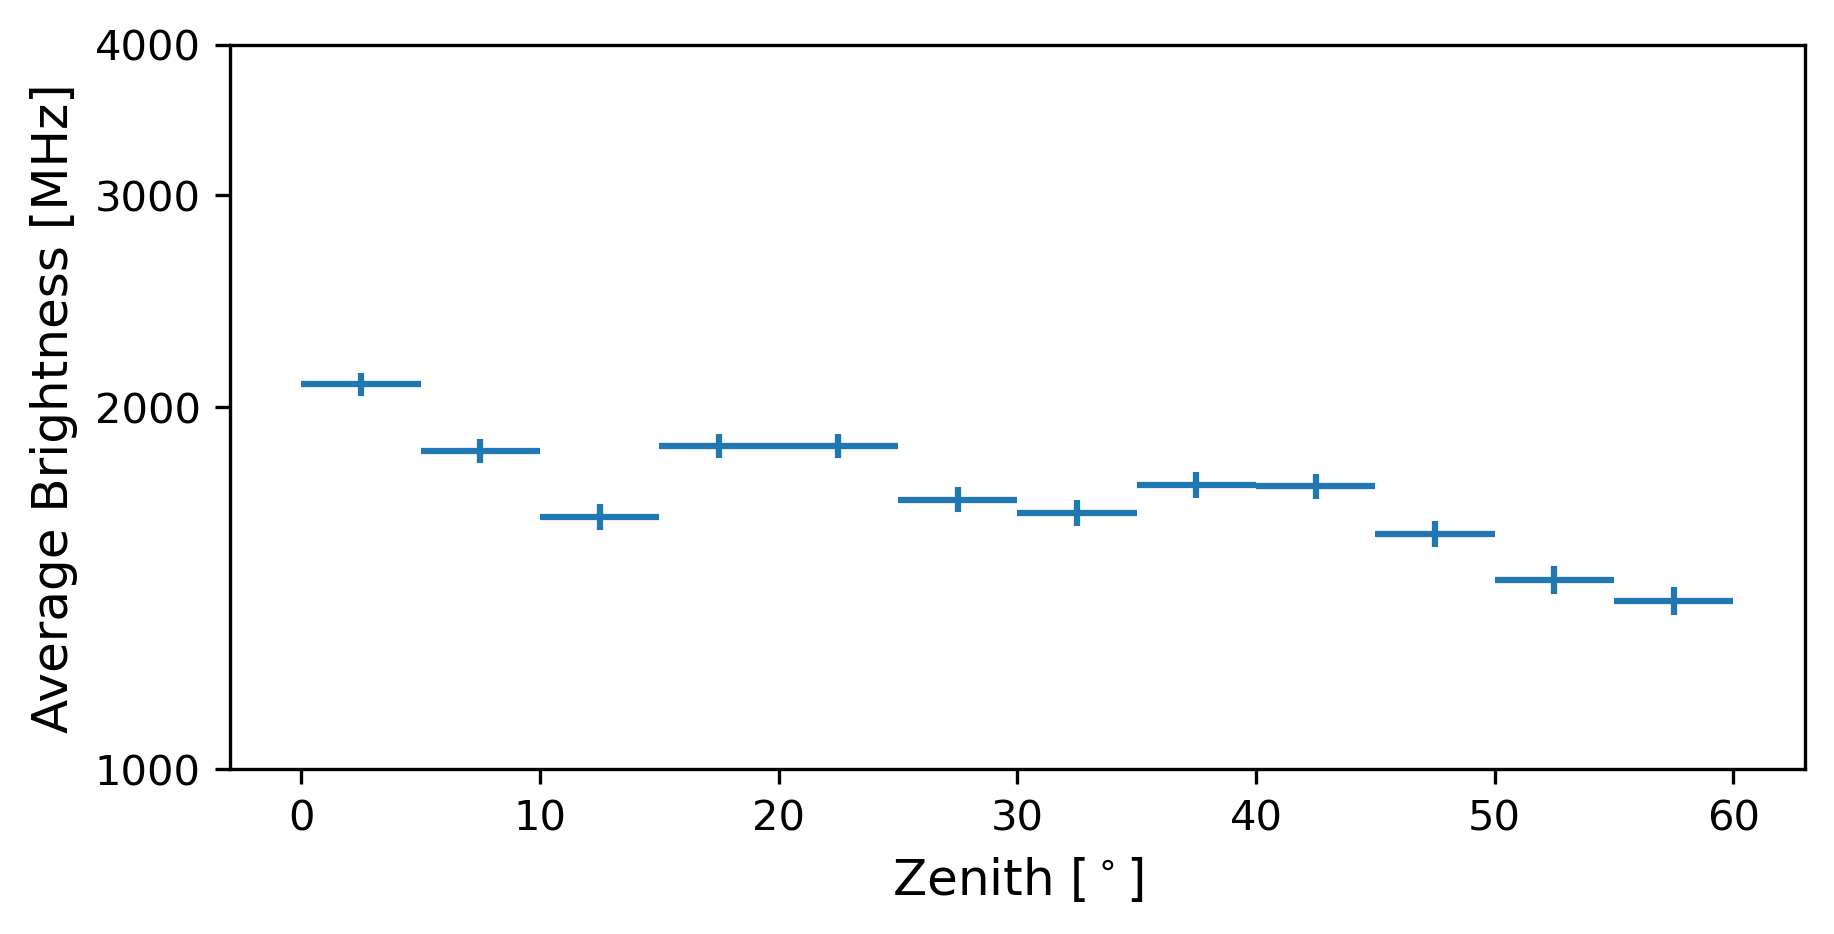

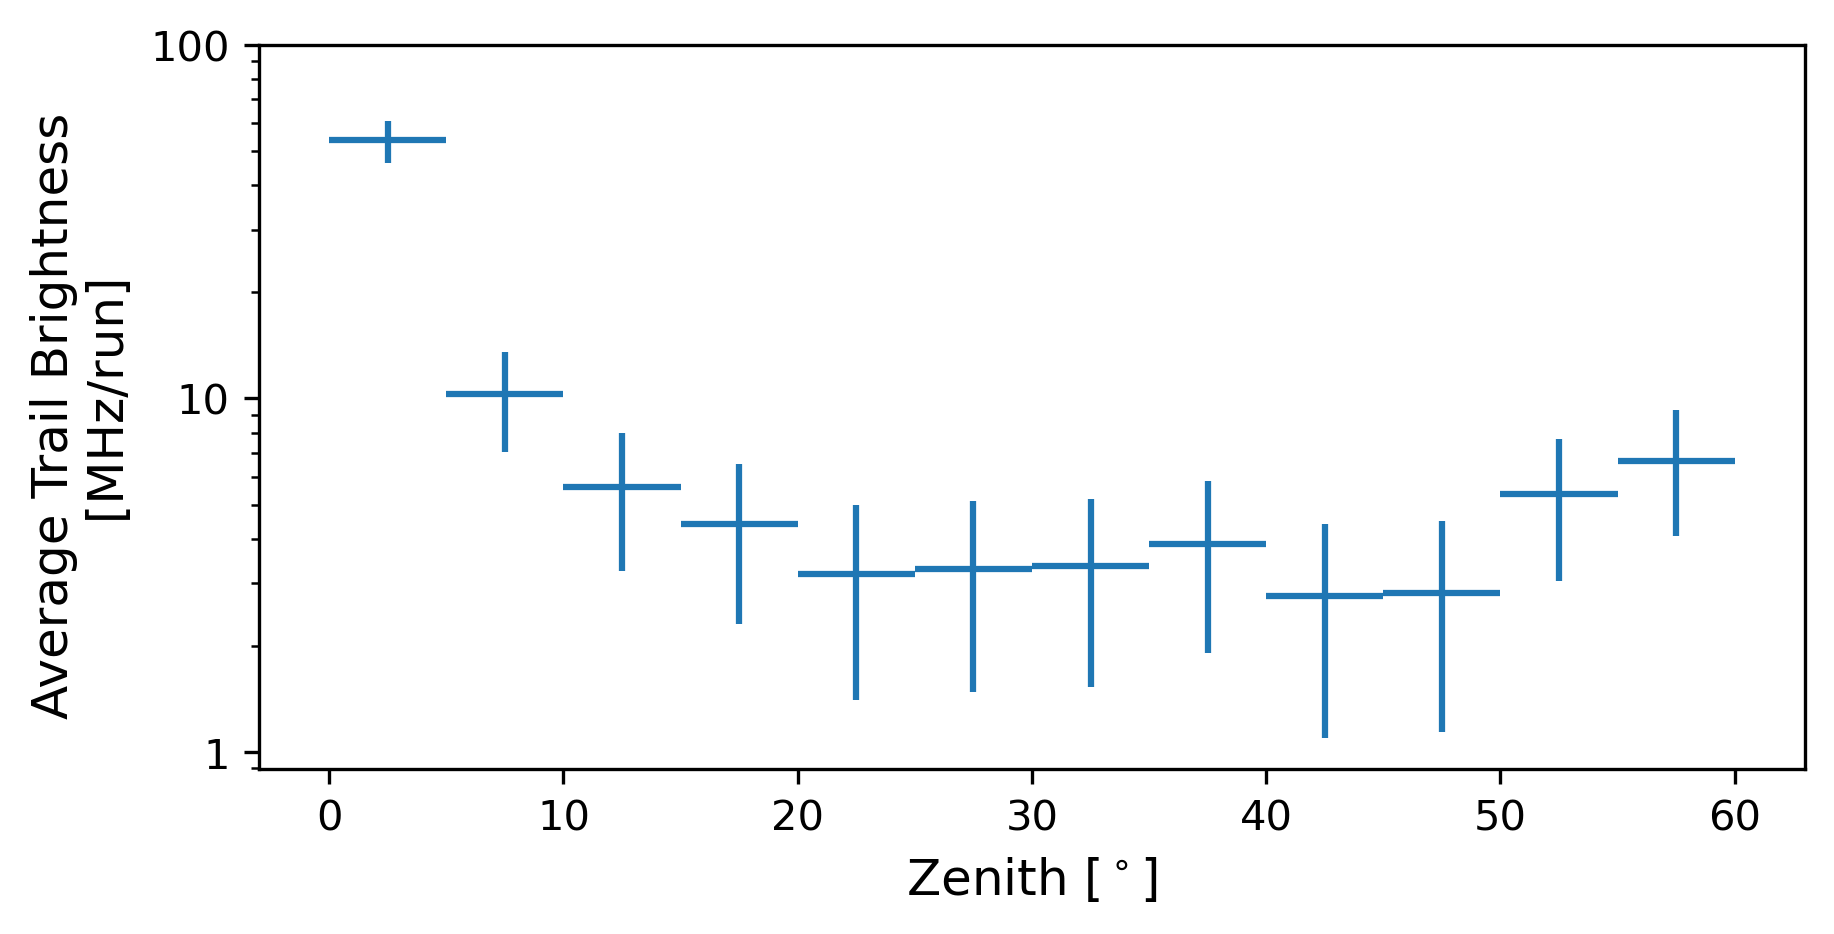

In [8]:

fig14_1, ax14_1 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hist_zenith_bright = []
no_runs = []
c,d = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
for i in range(len(zenith_bins)-1):
    mask_zenith_bin = np.logical_and(prop_dict["zenith"][mask_N]>=zenith_bins[i],
                            prop_dict["zenith"][mask_N]<zenith_bins[i+1])
    a = np.mean(prop_dict["avg_brightness"][mask_N][mask_zenith_bin])
    hist_zenith_bright.append(a)
    no_runs.append(c[i])

xcenters = (zenith_bins[:-1] + zenith_bins[1:]) / 2

im14_1 = ax14_1.errorbar(xcenters,hist_zenith_bright,yerr = np.sqrt(hist_zenith_bright), xerr = round((zenith_bins[1]-zenith_bins[0])/2,3),linestyle='None')
ax14_1.set_xlabel("Zenith [$^\circ$]")
ax14_1.set_ylabel("Average Brightness [MHz]")
ax14_1.set_yscale("log")
yticks = np.array([1000,2000,3000,4000])
ax14_1.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax14_1.set_yticklabels(yticks_label)
#ax14_1.set_ylim((900, np.max(prop_dict["avg_brightness"])))
fig14_1.savefig(os.path.join(path_to_plots,"hist_1D_zenith_brightness.jpg"))
plt.show()

fig14_1, ax14_1 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hist_zenith_bright = []
no_runs = []
c,d = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
for i in range(len(zenith_bins)-1):
    mask_zenith_bin = np.logical_and(prop_dict["zenith"][mask_N]>=zenith_bins[i],
                            prop_dict["zenith"][mask_N]<zenith_bins[i+1])
    a = np.mean(prop_dict["avg_brightness"][mask_N][mask_zenith_bin])
    hist_zenith_bright.append(a)
    no_runs.append(c[i])

xcenters = (zenith_bins[:-1] + zenith_bins[1:]) / 2

im14_1 = ax14_1.errorbar(xcenters,hist_zenith_bright/c,yerr = np.sqrt(hist_zenith_bright/c), xerr = round((zenith_bins[1]-zenith_bins[0])/2,3),linestyle='None')
ax14_1.set_xlabel("Zenith [$^\circ$]")
ax14_1.set_ylabel("Average Trail Brightness \n [MHz/run]")
ax14_1.set_yscale("log")
yticks = np.array([1,10, 100])
ax14_1.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax14_1.set_yticklabels(yticks_label)
#ax14_1.set_ylim((900, np.max(prop_dict["avg_brightness"])))
fig14_1.savefig(os.path.join(path_to_plots,"hist_1D_zenith_brightness_norm.jpg"))
plt.show()

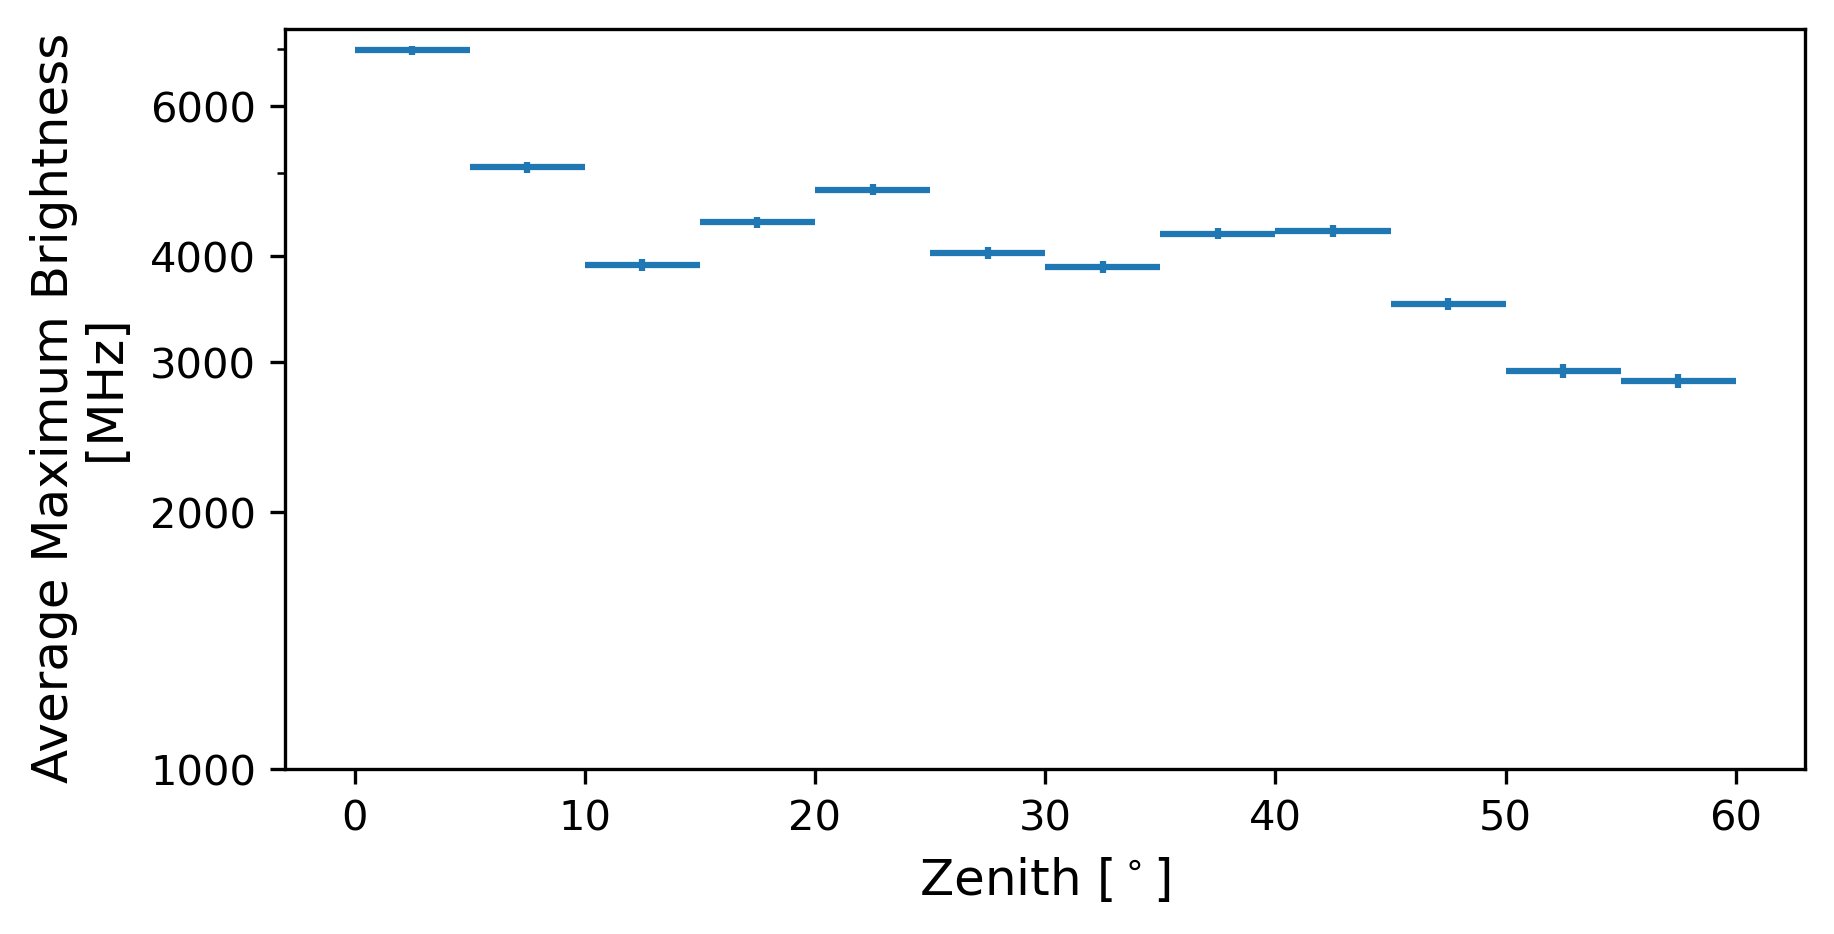

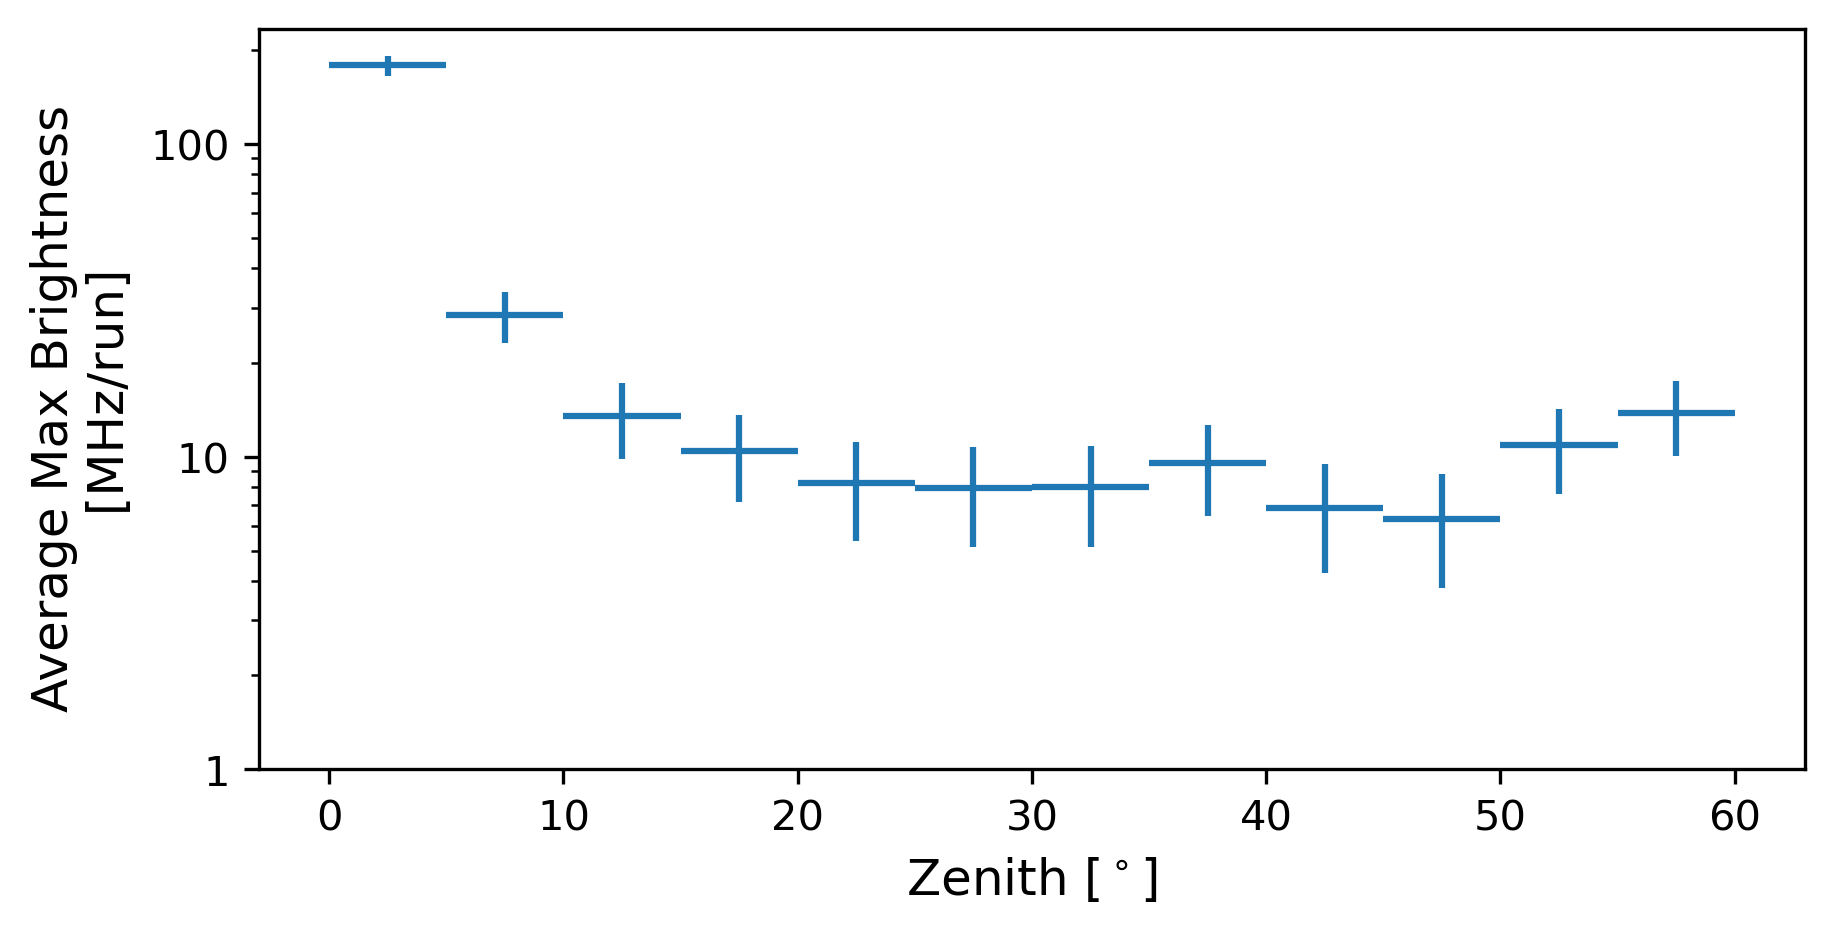

In [9]:

fig14_1, ax14_1 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hist_zenith_bright = []
no_runs = []
c,d = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
for i in range(len(zenith_bins)-1):
    mask_zenith_bin = np.logical_and(prop_dict["zenith"][mask_N]>=zenith_bins[i],
                            prop_dict["zenith"][mask_N]<zenith_bins[i+1])
    a = np.mean(prop_dict["max_brightness"][mask_N][mask_zenith_bin])
    hist_zenith_bright.append(a)
    no_runs.append(c[i])

xcenters = (zenith_bins[:-1] + zenith_bins[1:]) / 2

im14_1 = ax14_1.errorbar(xcenters,hist_zenith_bright,yerr = np.sqrt(hist_zenith_bright), xerr = round((zenith_bins[1]-zenith_bins[0])/2,3),linestyle='None')
ax14_1.set_xlabel("Zenith [$^\circ$]")
ax14_1.set_ylabel("Average Maximum Brightness \n [MHz]")
ax14_1.set_yscale("log")
yticks = np.array([1000,2000,3000,4000, 6000])
ax14_1.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax14_1.set_yticklabels(yticks_label)
#ax14_1.set_ylim((900, np.max(prop_dict["avg_brightness"])))
fig14_1.savefig(os.path.join(path_to_plots,"hist_1D_zenith_brightnessmax.jpg"))
plt.show()

fig14_1, ax14_1 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hist_zenith_bright = []
no_runs = []
c,d = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
for i in range(len(zenith_bins)-1):
    mask_zenith_bin = np.logical_and(prop_dict["zenith"][mask_N]>=zenith_bins[i],
                            prop_dict["zenith"][mask_N]<zenith_bins[i+1])
    a = np.mean(prop_dict["max_brightness"][mask_N][mask_zenith_bin])
    hist_zenith_bright.append(a)
    no_runs.append(c[i])

xcenters = (zenith_bins[:-1] + zenith_bins[1:]) / 2

im14_1 = ax14_1.errorbar(xcenters,hist_zenith_bright/c,yerr = np.sqrt(hist_zenith_bright/c), xerr = round((zenith_bins[1]-zenith_bins[0])/2,3),linestyle='None')
ax14_1.set_xlabel("Zenith [$^\circ$]")
ax14_1.set_ylabel("Average Max Brightness \n [MHz/run]")
ax14_1.set_yscale("log")
yticks = np.array([1,10, 100])
ax14_1.set_yticks(yticks)
yticks_label = yticks.astype("str")
ax14_1.set_yticklabels(yticks_label)
#ax14_1.set_ylim((900, np.max(prop_dict["avg_brightness"])))
fig14_1.savefig(os.path.join(path_to_plots,"hist_1D_zenith_brightness_normmax.jpg"))
plt.show()

[-42.62831461 -46.87080033 -50.23231254 ... -40.56513777 -40.56513777
 -49.52597546]


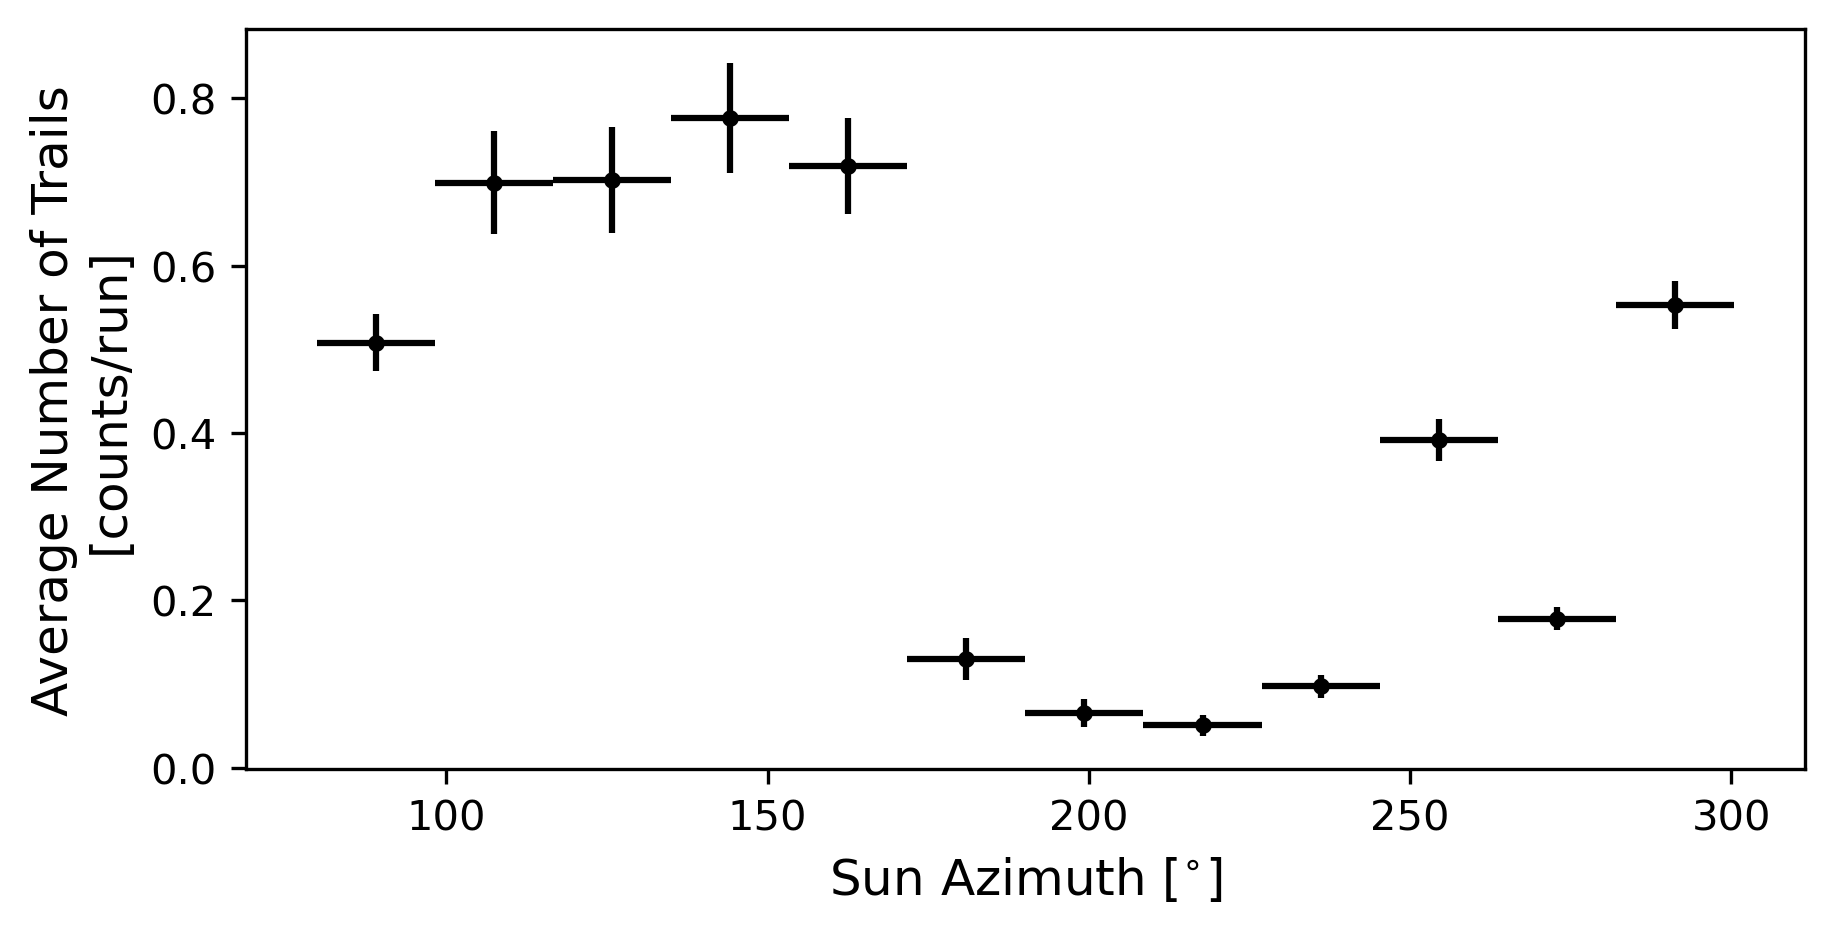

In [10]:
fig8_n, ax8_n = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
hesssite=EarthLocation.from_geodetic(lon=16.500974,lat=-23.271536,height=1800*u.m)
utcoffset = 2*u.hour  # Eastern Daylight Time
time=obstime-utcoffset
sunaltaz = get_sun(time).transform_to(AltAz(obstime=time,location=hesssite))
print(sunaltaz.alt.degree)
x,e=np.histogram(sunaltaz[mask_N].az.degree,bins=12)
bin_avg2 = (e[:-1]+e[1:])/2.0
y,f=np.histogram(sunaltaz[index_first_run].az.degree,bins=e)
ax8_n.errorbar(bin_avg2,x/y,xerr=abs((e[1]-e[0])/2.0),yerr=np.sqrt(x)/y,fmt=".k")
ax8_n.set_xlabel("Sun Azimuth [$^{\circ}$]")
ax8_n.set_ylabel("Average Number of Trails\n[counts/run]")
fig8_n.savefig(os.path.join(path_to_plots,"sunaz_hist_average.jpg"))

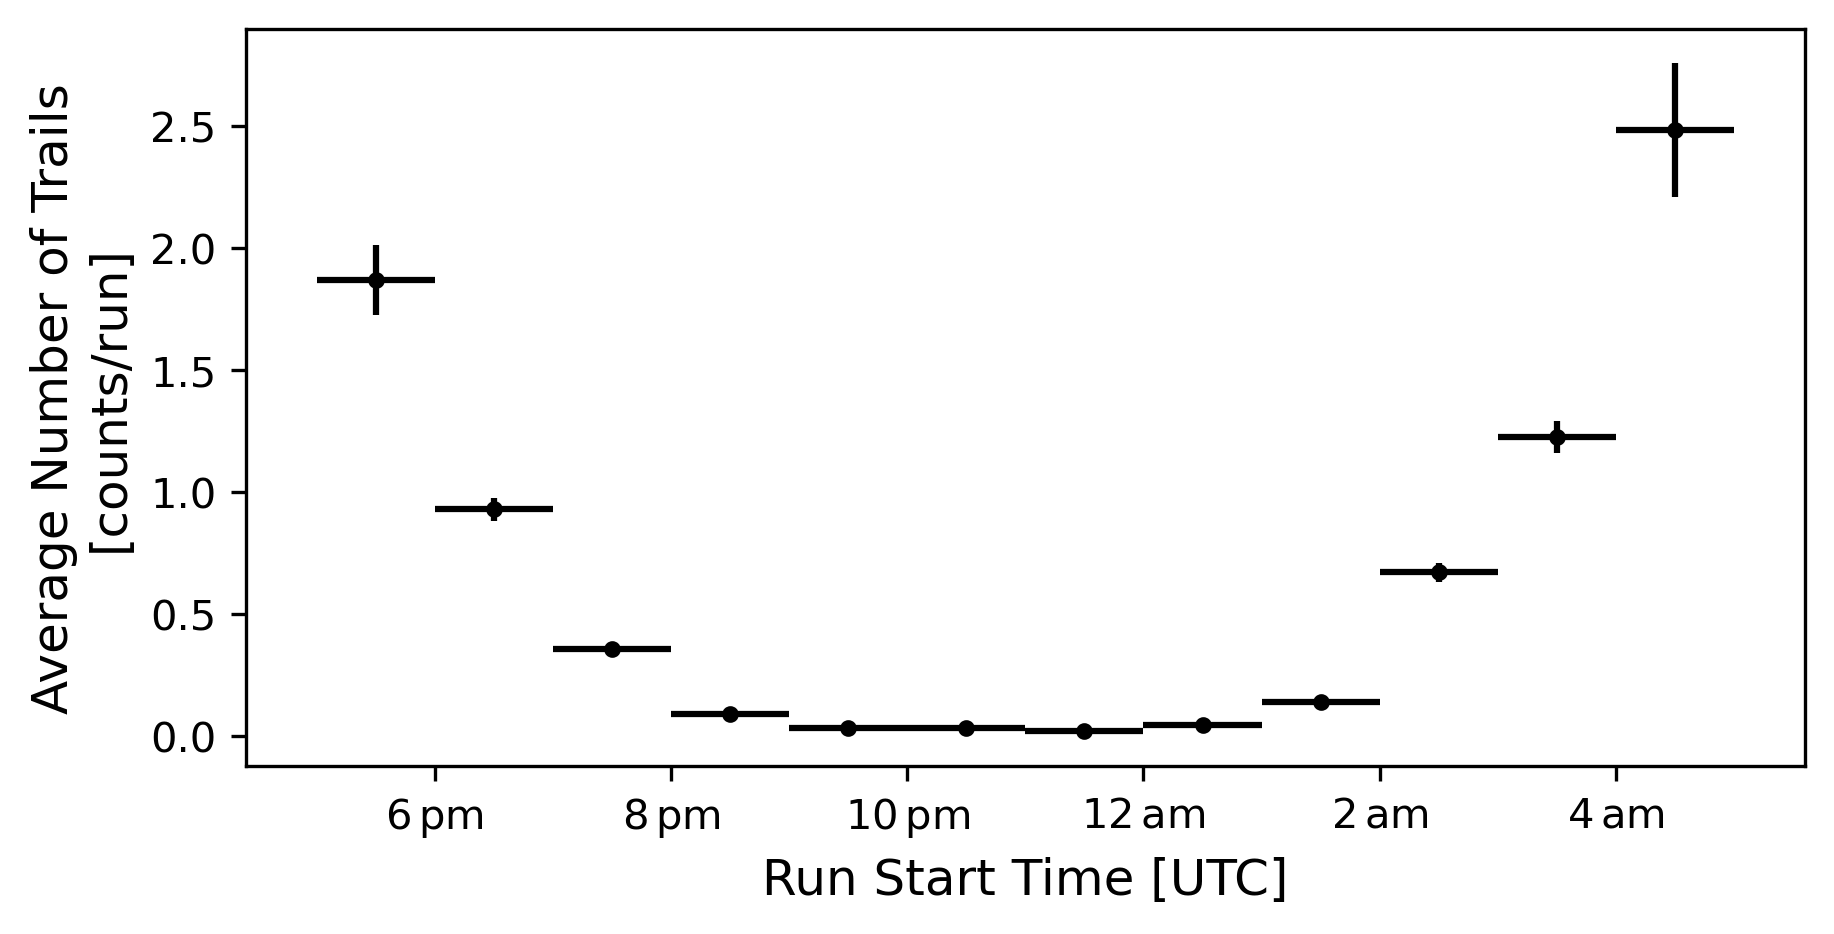

In [11]:


fig8_3, ax8_3 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
a,b = np.histogram(TIN[index_first_run], bins = TIN_bins)
c,d = np.histogram(TIN[mask_N], bins = TIN_bins)
bin_avg = (b[:-1]+b[1:])/2
ax8_3.errorbar(bin_avg, c/a, xerr = 0.5 , yerr = np.sqrt(c)/a, fmt = ".k")
ax8_3.set_xticks(np.arange(-6,6,2))
ax8_3.set_xticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
ax8_3.set_xlabel("Run Start Time [UTC]")
ax8_3.set_ylabel("Average Number of Trails\n[counts/run]")
#ax8_3.set_title("Number of runs per hour of night")
fig8_3.savefig(os.path.join(path_to_plots,"TIN_hist_average.jpg"))

[ 0  5 10 15 20 25 30 35 40 45 50 55 60]


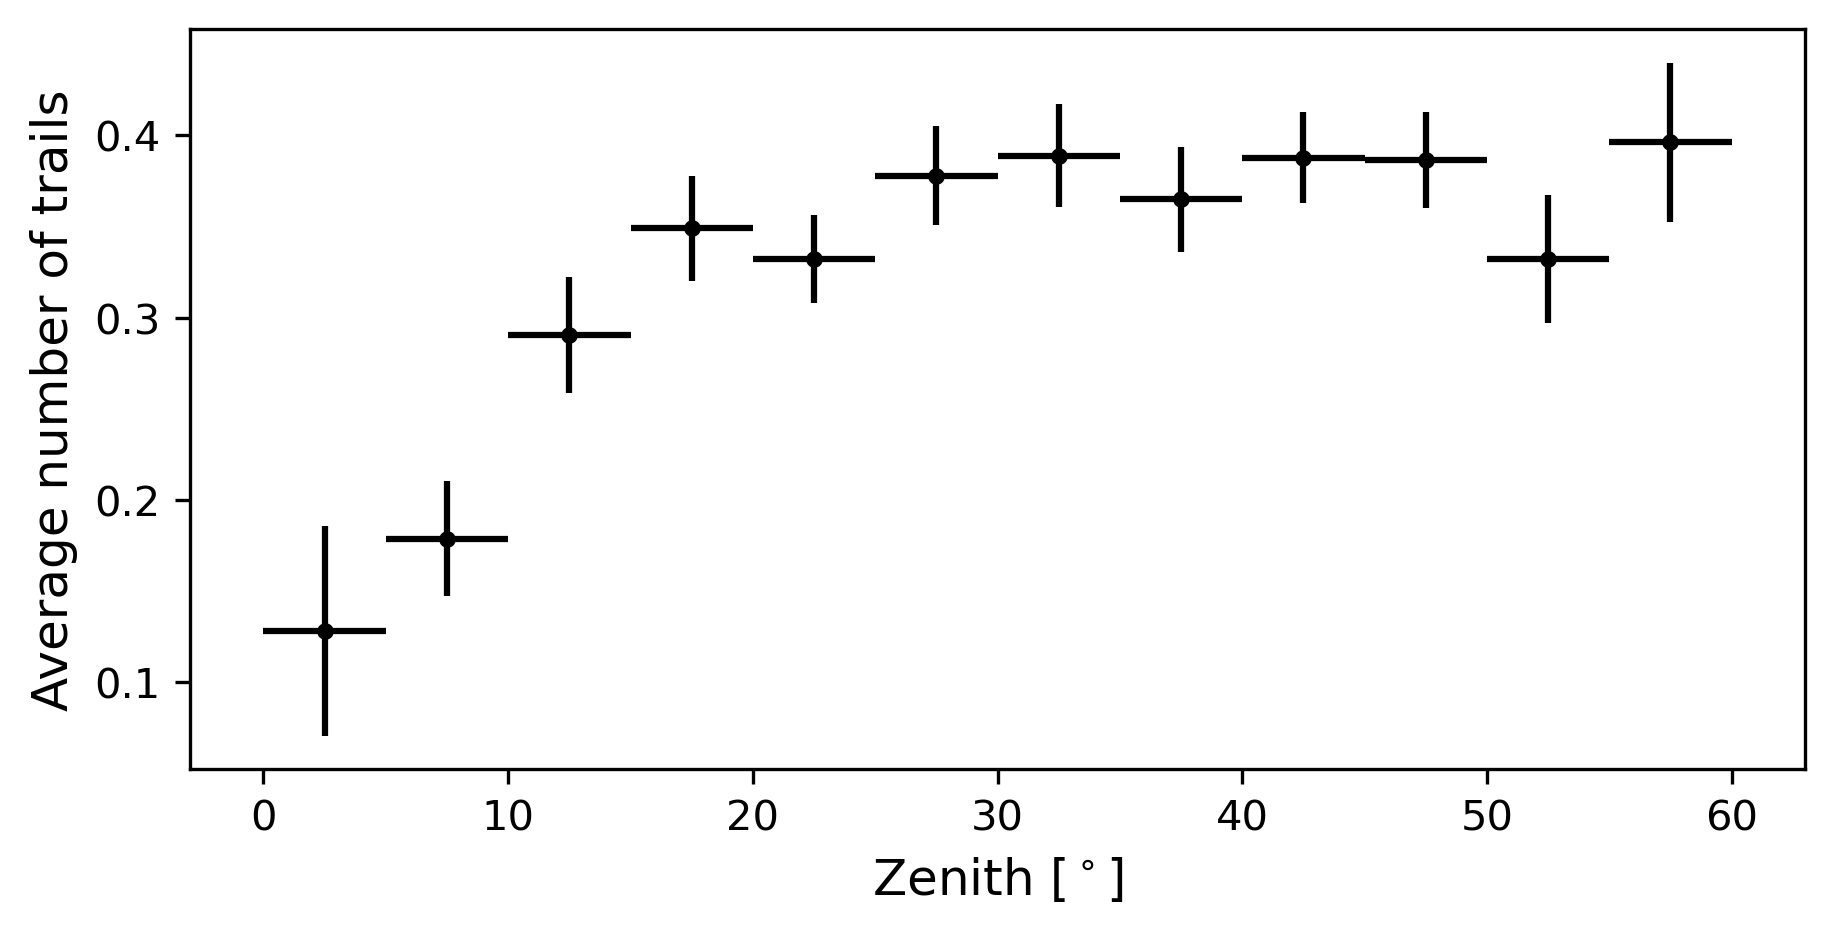

In [12]:
fig9_3, ax9_3 = plt.subplots(1, 1, figsize=figure_size, constrained_layout=True)
a,b = np.histogram(prop_dict["zenith"][index_first_run], bins = zenith_bins)
c,d = np.histogram(prop_dict["zenith"][mask_N], bins = zenith_bins)
bin_avg = (b[:-1]+b[1:])/2
ax9_3.errorbar(bin_avg, c/a, xerr = 2.5 , yerr = np.sqrt(c)/a, fmt = ".k")
# ax9_3.set_xticks(np.arange(-6,6,2))
#ax8_3.set_xticklabels(["6$\,$pm", "8$\,$pm", "10$\,$pm", "12$\,$am", "2$\,$am", "4$\,$am"])
ax9_3.set_xlabel("Zenith [$^\circ$]")
ax9_3.set_ylabel("Average number of trails")
#ax9_3.set_title("Number of runs per hour of night")
fig9_3.savefig(os.path.join(path_to_plots,"zen_hist_average.jpg"))
print(zenith_bins)

In [13]:

SST = lin(2030, popt[0], popt[1])*(9/3.4)**2*60.0/28.0
MST = lin(2030, popt[0], popt[1])*(8/3.4)**2*60.0/28.0
LST = lin(2030, popt[0], popt[1])*(4.3/3.4)**2*60.0/28.0

print(SST,MST,LST)
alpha_SST=np.sqrt(2030**2*pcov[0,0]+pcov[1,1])
print(alpha_SST)


15.120272831240309 11.946882237029381 3.4515289462917695
72.482823510623
